# Business Case - Walmart (Confidence Interval and CLT)

---
---

## Import the necessary libraries

In [95]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy.stats import norm

import os
import warnings
warnings.filterwarnings('ignore')

---

## 1. Read the data set and store it as a data frame

In [2]:
#Get the current working directory
os.getcwd()

'C:\\Users\\user\\Desktop\\Business Case - Walmart'

In [3]:
#Set working directory to desired folder
os.chdir('C:\\Users\\user\\Desktop\\Business Case - Walmart')

In [4]:
#Read the data set and store it is as a data frame
walmart_data = pd.read_csv("walmart_data.csv")
walmart_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


---

## Get a preliminary understanding of the structure of the data

In [5]:
walmart_data.head(n=10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [6]:
walmart_data.tail(n=10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [7]:
walmart_data.shape

(550068, 10)

<ins>Observations</ins>
- There are 550,068 rows and 10 columns in the data set.

In [8]:
walmart_data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [9]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


<ins>Observations</ins>
- The only continuous variable in this data set is the purchase amount denoted by the 'Purchase' column.
- Although 'User_ID', 'Occupation', 'Marital_Status' and 'Product_Category' are read as an integer type variables, practically speaking, the numbers represents different non-numerical values/categories. Retaining them as integer type is not logical as no  meaningful mathematical operations can be performed on their values. 
- The 'Stay_In_Current_City_Years' variable is read as object type because of the value '4+' which is a categorical value representing all those who have been living in their current city for 4 or more years.

---

## Basic Analysis - Data Preprocessing

### Renaming the 'Purchase' column to 'Purchase_Amount'

In [10]:
walmart_data.columns.values

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category', 'Purchase'], dtype=object)

In [11]:
walmart_data.rename(columns={'Purchase':'Purchase_Amount'},inplace=True)

In [12]:
walmart_data.columns.values

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category', 'Purchase_Amount'], dtype=object)

### Missing value detection

In [13]:
#Get a count of the number of the missing values in each column of the data set
walmart_data.isna().sum(axis=0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase_Amount               0
dtype: int64

<ins>Observations</ins>
- There are no missing values in any column of the data set. Hence, no missing value handling steps such as dropping rows/columns, or imputation are necessary.

### Changing the data type of columns where appropriate

In [14]:
walmart_data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase_Amount                int64
dtype: object

In [15]:
#Converting the 'User_ID' column to the object type as there are a large number of unique values expected
walmart_data['User_ID'] = walmart_data['User_ID'].astype('object')

In [16]:
#Converting the 'Occupation', 'Marital_Status' and 'Product_Category' columns to the category type as there are only a 
#few number unique values expected for each
walmart_data['Occupation'] = walmart_data['Occupation'].astype('category')
walmart_data['Marital_Status'] = walmart_data['Marital_Status'].astype('category')
walmart_data['Product_Category'] = walmart_data['Product_Category'].astype('category')

In [17]:
#Converting the 'Gender', Age', 'City_Category' and 'Stay_In_Current_City_Years' columns to the category type as there 
#are only a few number unique values expected for each
walmart_data['Gender'] = walmart_data['Gender'].astype('category')
walmart_data['Age'] = walmart_data['Age'].astype('category')
walmart_data['City_Category'] = walmart_data['City_Category'].astype('category')
walmart_data['Stay_In_Current_City_Years'] = walmart_data['Stay_In_Current_City_Years'].astype('category')

In [18]:
walmart_data.dtypes

User_ID                         object
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase_Amount                  int64
dtype: object

##

## 2. Outlier detection and handling for the continuous variable

### Detection of outliers

In [19]:
#There is a single continuous variable in this data set - 'Purchase_Amount'
#Get a numerical summary description of this variable
walmart_data.describe()

,Purchase_Amount
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [20]:
#Get the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR for 'Purchase_Amount'
pa_desc=walmart_data["Purchase_Amount"].describe()
print(f"Minimum={pa_desc['min']}, Q1={pa_desc['25%']}, Median={pa_desc['50%']}, Q3={pa_desc['75%']}, Maximum={pa_desc['max']}")
IQR_pa=pa_desc['75%']-pa_desc['25%']
print(f"IQR={IQR_pa}")

Minimum=12.0, Q1=5823.0, Median=8047.0, Q3=12054.0, Maximum=23961.0
IQR=6231.0


In [21]:
#Finding the outliers in the 'Purchase_Amount' variable using the 1.5*IQR method
pa_outliers=walmart_data[(walmart_data["Purchase_Amount"]<pa_desc['25%']-1.5*IQR_pa) | (walmart_data["Purchase_Amount"]>pa_desc['75%']+1.5*IQR_pa)
            ].Purchase_Amount.sort_values()
print(pa_outliers.to_list())
print("Number of outliers :",pa_outliers.count())
print("Number of unique outliers :",pa_outliers.nunique())

[21401, 21401, 21401, 21402, 21404, 21404, 21405, 21405, 21406, 21408, 21409, 21410, 21410, 21410, 21411, 21411, 21412, 21412, 21412, 21415, 21416, 21417, 21418, 21418, 21418, 21419, 21421, 21421, 21422, 21422, 21422, 21423, 21423, 21423, 21423, 21423, 21424, 21424, 21425, 21425, 21427, 21427, 21427, 21428, 21429, 21429, 21430, 21431, 21433, 21433, 21433, 21435, 21435, 21435, 21435, 21436, 21437, 21437, 21437, 21437, 21438, 21438, 21438, 21438, 21439, 21439, 21440, 21440, 21441, 21441, 21441, 21442, 21443, 21443, 21443, 21443, 21444, 21445, 21445, 21446, 21447, 21447, 21448, 21448, 21449, 21450, 21450, 21451, 21451, 21452, 21453, 21453, 21453, 21454, 21454, 21455, 21456, 21459, 21461, 21462, 21462, 21462, 21462, 21462, 21462, 21463, 21463, 21463, 21464, 21466, 21467, 21468, 21468, 21468, 21468, 21469, 21469, 21469, 21470, 21470, 21471, 21471, 21472, 21472, 21474, 21475, 21475, 21475, 21475, 21476, 21476, 21476, 21477, 21477, 21478, 21478, 21479, 21479, 21481, 21481, 21482, 21482, 21482

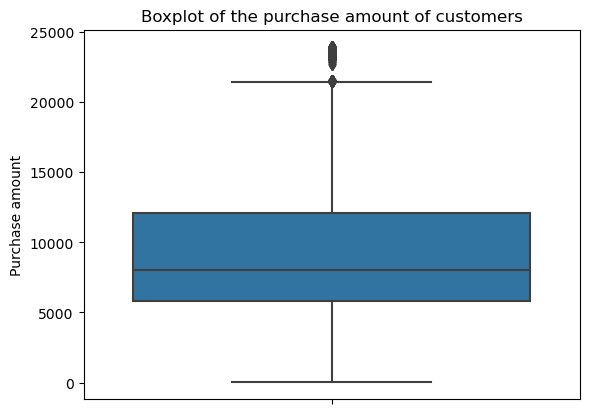

In [22]:
#Boxplot of the age of customers
sns.boxplot(y='Purchase_Amount',data=walmart_data)
plt.title("Boxplot of the purchase amount of customers")
plt.ylabel("Purchase amount")
plt.show()

<ins>Observations</ins>
- There appear to be outliers present at the higher end of the distribution.

### Handling of outliers

In [23]:
#Limit the values in each numerical column to between the 5th percentile and 95th percentile
walmart_data["Purchase_Amount"]=np.clip(walmart_data["Purchase_Amount"],walmart_data["Purchase_Amount"].quantile(0.05),
                                        walmart_data["Purchase_Amount"].quantile(0.95))

In [24]:
#Get a numerical summary description of this variable
walmart_data.describe()

,Purchase_Amount
count,550068.000000
mean,9256.710489
std,4855.947166
min,1984.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,19336.000000


---

## Univariate analysis of the categorical columns

In [25]:
#Summary measures for all the categorical columns
walmart_data.describe(include='category')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,2,7,21,3,5,2,20
top,M,26-35,4,B,1,0,5
freq,414259,219587,72308,231173,193821,324731,150933


### Gender

In [26]:
#Get the number of unqiue values of the 'Gender' column
walmart_data["Gender"].nunique()

2

In [27]:
#Get the unique values of the 'Gender' column
walmart_data["Gender"].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [28]:
#Get the counts of each unique value of the 'Gender' column
walmart_data["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

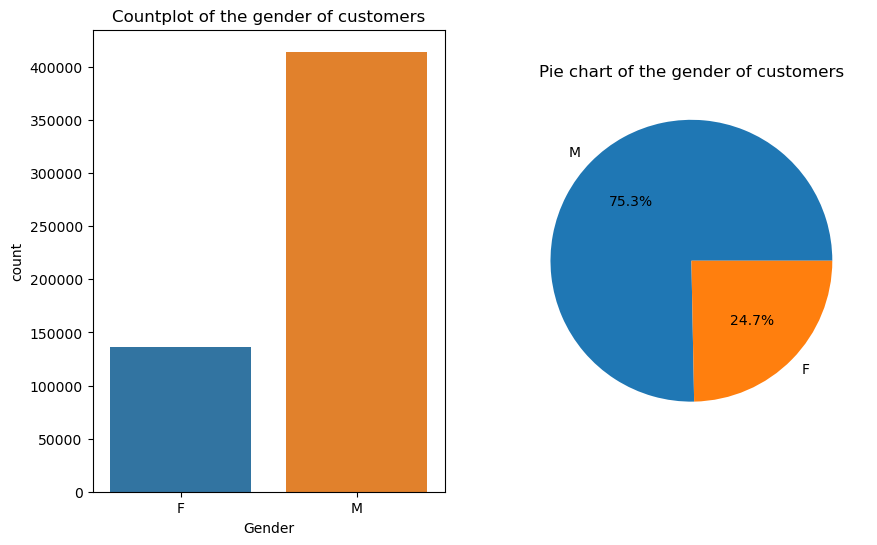

In [29]:
#Visualize the countplot and pie chart for the 'Gender' column
fig, ax = plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x="Gender",data=walmart_data)
plt.title("Countplot of the gender of customers")

plt.subplot(1,2,2)
plt.pie(x=walmart_data["Gender"].value_counts().values,labels=walmart_data["Gender"].value_counts().index,autopct='%2.1f%%')
plt.title("Pie chart of the gender of customers")
plt.show()

<ins>Observations</ins>
- A majority of Black Friday purchases were made by males (around three-fourths) as compared to females.

### Age

In [30]:
#Get the number of unqiue values of the 'Age' column
walmart_data["Age"].nunique()

7

In [31]:
#Get the unique values of the 'Age' column
walmart_data["Age"].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [32]:
#Get the counts of each unique value of the 'Age' column
walmart_data["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

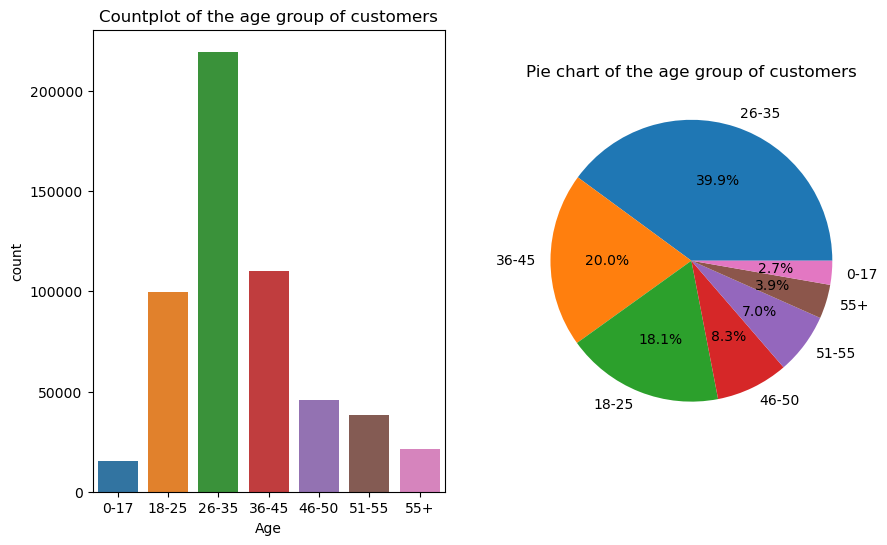

In [33]:
#Visualize the countplot and pie chart for the 'Age' column
fig, ax = plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x="Age",data=walmart_data)
plt.title("Countplot of the age group of customers")

plt.subplot(1,2,2)
plt.pie(x=walmart_data["Age"].value_counts().values,labels=walmart_data["Age"].value_counts().index,autopct='%2.1f%%')
plt.title("Pie chart of the age group of customers")
plt.show()

<ins>Observations</ins>
- The bulk of purchases (almost 80%) were made by customers in the age groups of 18-25, 26-35 and 36-45.
- The single largest age group of Walmart's Black Friday customers was 26-35, accounting for almost 40% of transactions.

### Marital_Status

In [34]:
#Get the number of unqiue values of the 'Marital_Status' column
walmart_data["Marital_Status"].nunique()

2

In [35]:
#Get the unique values of the 'Marital_Status' column
walmart_data["Marital_Status"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [36]:
#Get the counts of each unique value of the 'Marital_Status' column
walmart_data["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

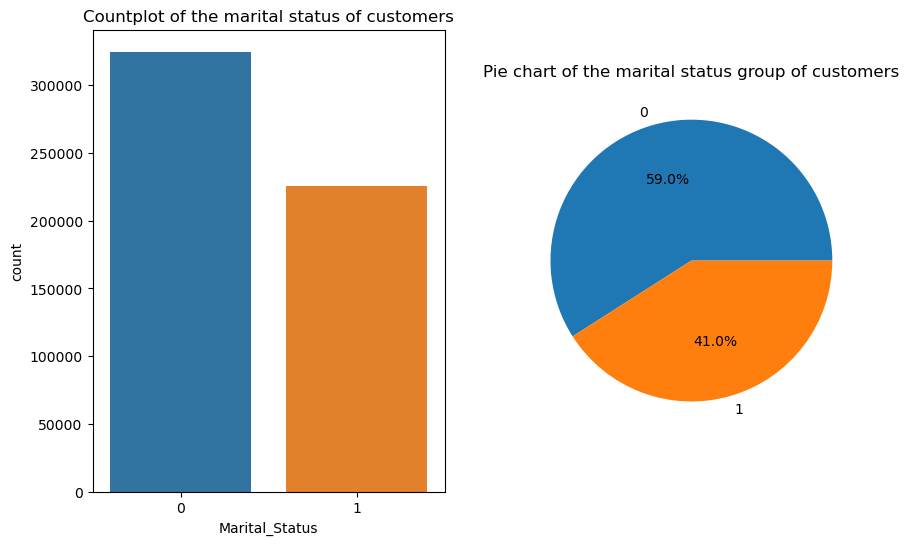

In [37]:
#Visualize the countplot and pie chart for the 'Marital_Status' column
fig, ax = plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x="Marital_Status",data=walmart_data)
plt.title("Countplot of the marital status of customers")

plt.subplot(1,2,2)
plt.pie(x=walmart_data["Marital_Status"].value_counts().values,labels=walmart_data["Marital_Status"].value_counts().index,autopct='%2.1f%%')
plt.title("Pie chart of the marital status group of customers")
plt.show()

<ins>Observations</ins>
- Most of the purchases were made by customers with Marital_Status of 1.

### Occupation

In [38]:
#Get the number of unqiue values of the 'Occupation' column
walmart_data["Occupation"].nunique()

21

In [39]:
#Get the unique values of the 'Occupation' column
walmart_data["Occupation"].unique()

[10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]

In [40]:
#Get the counts of each unique value of the 'Occupation' column
walmart_data["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

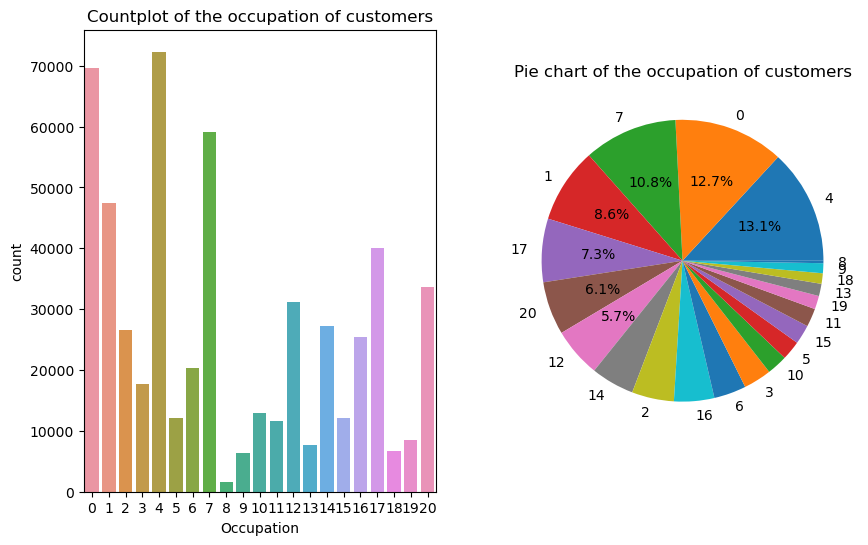

In [41]:
#Get the number of unqiue values of the 'Occupation' column
walmart_data["Occupation"].nunique()

#Get the unique values of the 'Occupation' column
walmart_data["Occupation"].unique()

#Get the counts of each unique value of the 'Occupation' column
walmart_data["Occupation"].value_counts()

#Visualize the countplot and pie chart for the 'Occupation' column
fig, ax = plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x="Occupation",data=walmart_data)
plt.title("Countplot of the occupation of customers")

plt.subplot(1,2,2)
plt.pie(x=walmart_data["Occupation"].value_counts().values,labels=walmart_data["Occupation"].value_counts().index,
        autopct=lambda v: f'{v:.1f}%' if v > 5 else None)
plt.title("Pie chart of the occupation of customers")
plt.show()

<ins>Observations</ins>
- The top 3 most common occupations of customers who made Black Friday purchases was 0, 7, and 1.

### City_Category

In [42]:
#Get the number of unqiue values of the 'City_Category' column
walmart_data["City_Category"].nunique()

3

In [43]:
#Get the unique values of the 'City_Category' column
walmart_data["City_Category"].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [44]:
#Get the counts of each unique value of the 'City_Category' column
walmart_data["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

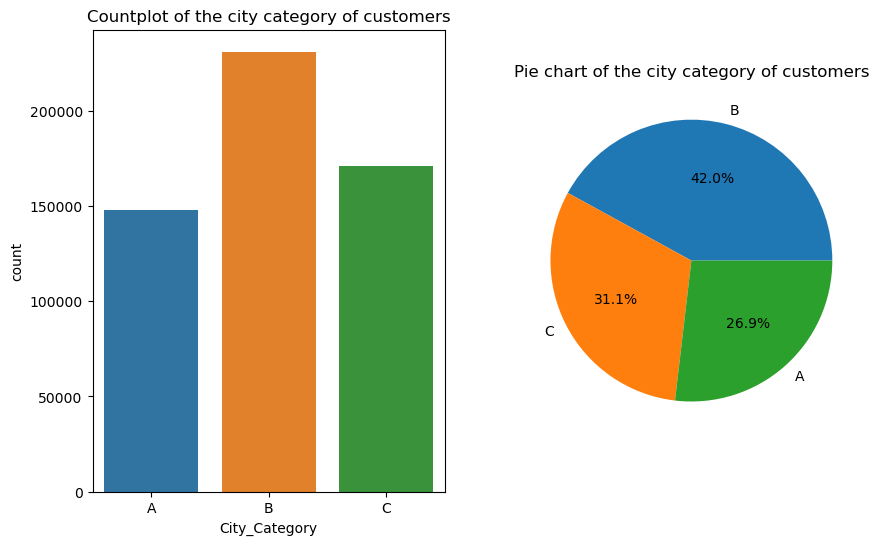

In [45]:
#Visualize the countplot and pie chart for the 'City_Category' column
fig, ax = plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x="City_Category",data=walmart_data)
plt.title("Countplot of the city category of customers")

plt.subplot(1,2,2)
plt.pie(x=walmart_data["City_Category"].value_counts().values,labels=walmart_data["City_Category"].value_counts().index,autopct='%2.1f%%')
plt.title("Pie chart of the city category of customers")
plt.show()

<ins>Observations</ins>
- Maximum number of purchases were made by customers in city category B, followed by C, and then A.

### Stay_In_Current_City_Years

In [46]:
#Get the number of unqiue values of the 'Stay_In_Current_City_Years' column
walmart_data["Stay_In_Current_City_Years"].nunique()

5

In [47]:
#Get the unique values of the 'Stay_In_Current_City_Years' column
walmart_data["Stay_In_Current_City_Years"].unique()

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

In [48]:
#Get the counts of each unique value of the 'Stay_In_Current_City_Years' column
walmart_data["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

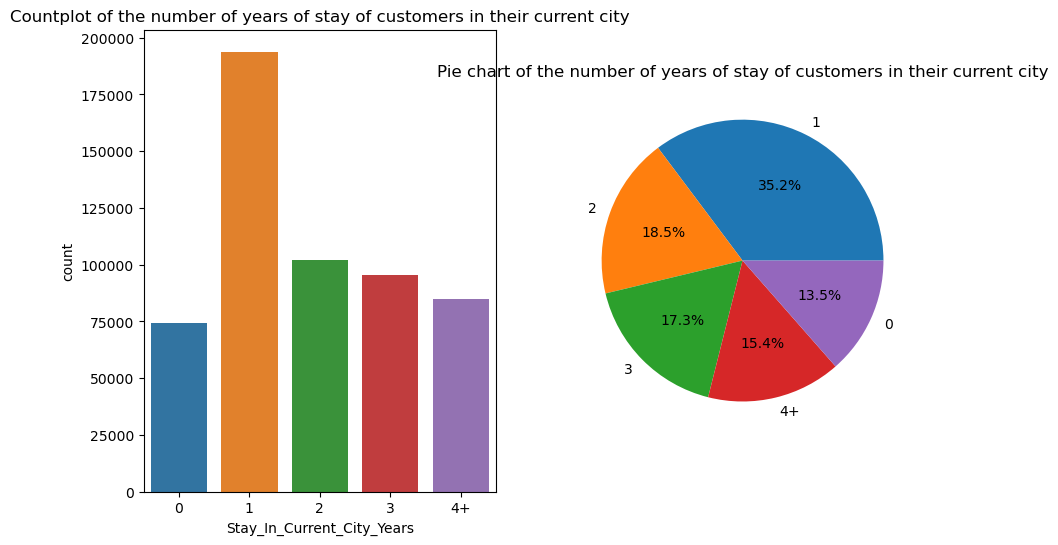

In [49]:
#Visualize the countplot and pie chart for the 'Stay_In_Current_City_Years' column
fig, ax = plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x="Stay_In_Current_City_Years",data=walmart_data)
plt.title("Countplot of the number of years of stay of customers in their current city")

plt.subplot(1,2,2)
plt.pie(x=walmart_data["Stay_In_Current_City_Years"].value_counts().values,labels=walmart_data["Stay_In_Current_City_Years"].value_counts().index,autopct='%2.1f%%')
plt.title("Pie chart of the number of years of stay of customers in their current city")
plt.show()

<ins>Observations</ins>
- The maximum number of Black Friday purchases were made by customers who were living in their current city for a year.

### Product_Category

In [50]:
#Get the number of unqiue values of the 'Product_Category' column
walmart_data["Product_Category"].nunique()

20

In [51]:
#Get the unique values of the 'Product_Category' column
walmart_data["Product_Category"].unique()

[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]

In [52]:
#Get the counts of each unique value of the 'Product_Category' column
walmart_data["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

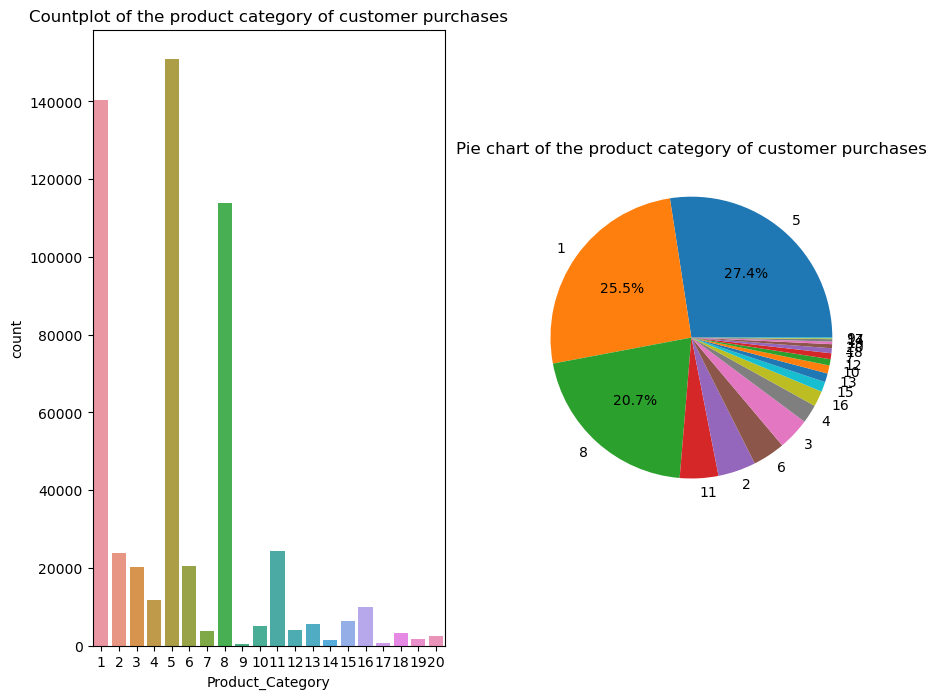

In [53]:
#Visualize the countplot and pie chart for the 'Product_Category' column
fig, ax = plt.subplots(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(x="Product_Category",data=walmart_data)
plt.title("Countplot of the product category of customer purchases")

plt.subplot(1,2,2)
plt.pie(x=walmart_data["Product_Category"].value_counts().values,labels=walmart_data["Product_Category"].value_counts().index,
        autopct=lambda v: f'{v:.1f}%' if v > 5 else None)
plt.title("Pie chart of the product category of customer purchases")
plt.show()

<ins>Observations</ins>
- The three most popular product categories by Black Friday customers were 5, 1, and 8.

---

## Univariate analysis of the numerical column

In [54]:
#Summary measures for all the numerical columns
walmart_data.describe()

,Purchase_Amount
count,550068.000000
mean,9256.710489
std,4855.947166
min,1984.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,19336.000000


### Purchase_Amount

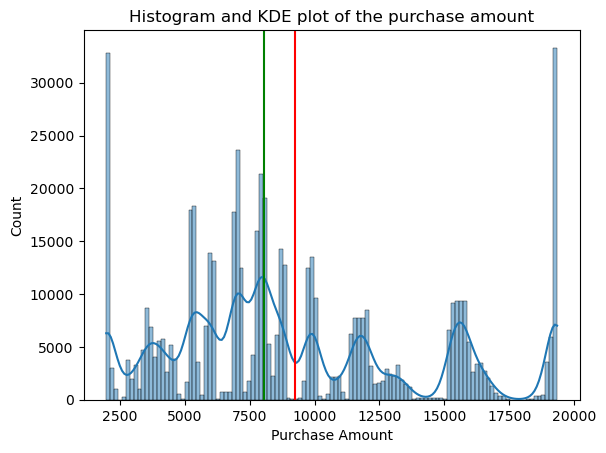

In [55]:
#Histogram and KDE plot of the purchase amount
sns.histplot(x='Purchase_Amount',data=walmart_data,kde=True)
plt.axvline(walmart_data["Purchase_Amount"].mean(),color="red")
plt.axvline(walmart_data["Purchase_Amount"].median(),color="green")
plt.title("Histogram and KDE plot of the purchase amount")
plt.xlabel("Purchase Amount")
plt.show()

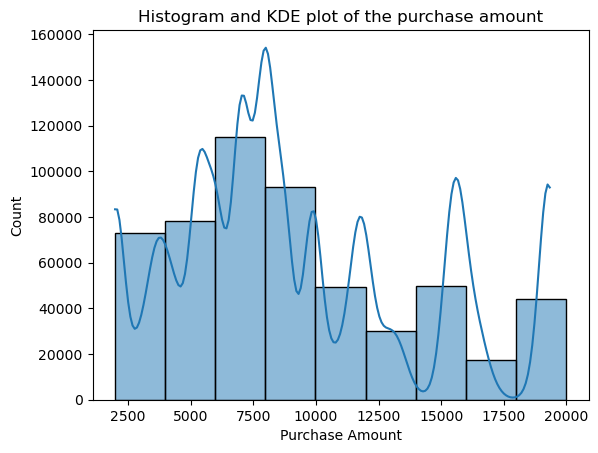

In [56]:
#Histogram and KDE plot of the purchase amount
sns.histplot(x='Purchase_Amount',data=walmart_data,binwidth=2000,kde=True)
plt.title("Histogram and KDE plot of the purchase amount")
plt.xlabel("Purchase Amount")
plt.show()

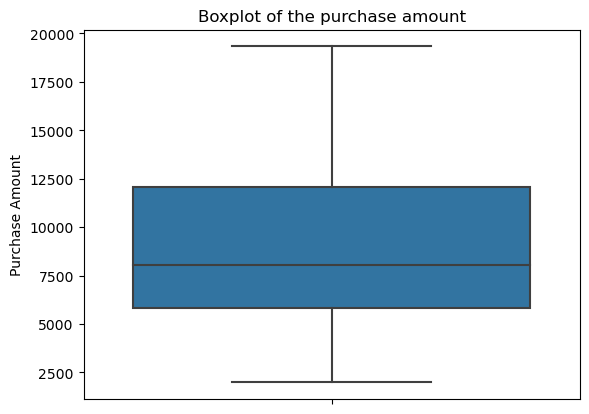

In [57]:
#Boxplot of the purchase amount
sns.boxplot(y='Purchase_Amount',data=walmart_data)
plt.title("Boxplot of the purchase amount")
plt.ylabel("Purchase Amount")
plt.show()

<ins>Observations</ins>
- Both the density plot and the boxplot indicate that the distribution of purchase amounts is slightly right-skewed.
- It is observed that the distribution of amounts varies widely, with multiple peaks and valleys. This could be due to the nature of product pricing where prices are set at certain identifibale values.

---

## 3. Data Exploration

### Relationship between product category and age groups

In [58]:
#Get the count of each combination of the Product_Category' and 'Age' variables
walmart_data[["Age","Product_Category"]].value_counts()

Age    Product_Category
26-35  5                   61473
       1                   58249
       8                   44256
36-45  5                   29377
18-25  5                   28522
                           ...  
51-55  9                      29
0-17   18                     27
       9                      16
55+    9                       8
0-17   17                      6
Length: 140, dtype: int64

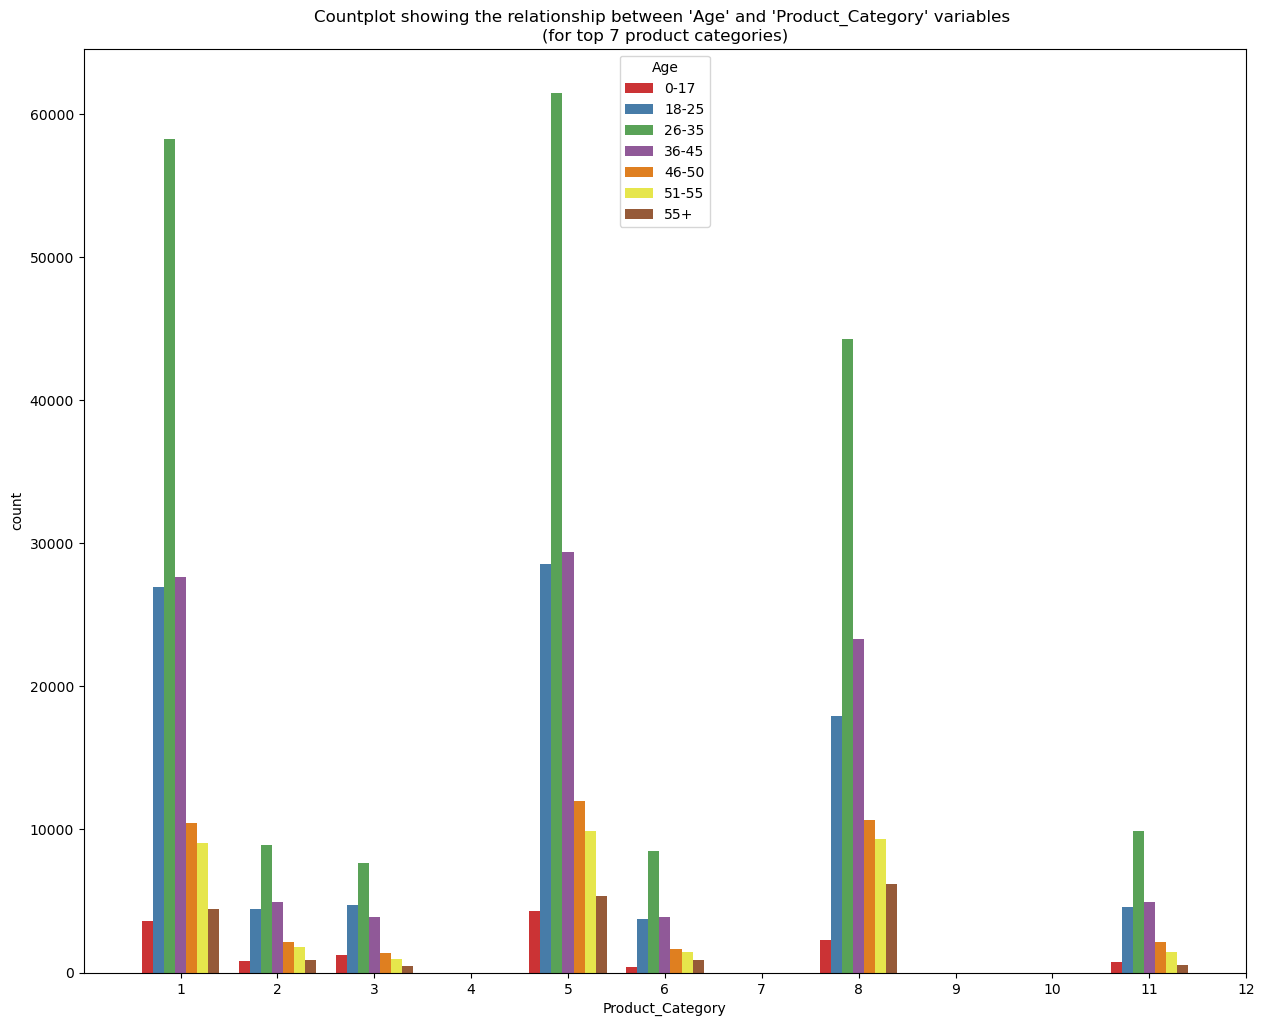

In [59]:
#Countplot showing the relationship between 'Product_Category' and 'Age' variables
plt.figure(figsize=(15, 12))
top7_pc=walmart_data['Product_Category'].value_counts().index[:7]
sns.countplot(x='Product_Category',data=walmart_data[walmart_data['Product_Category'].isin(top7_pc)],hue='Age',palette='Set1')
plt.title("Countplot showing the relationship between 'Age' and 'Product_Category' variables \n(for top 7 product categories)")
plt.xlim(-1,11)
plt.show()

<ins>Observations</ins>
- The 26-35 age group has the highest number of Black Friday purchases across almost all product categories, making them the primary target for marketing efforts. The top 3 age groups are 26-35, 36-45, and 18-25.
- Product Categories 5, 1, and 8 are consistently the most popular across all age groups, indicating a strong preference for these items.
- Among all the age groups, 26-35 and 36-45 show higher engagement and purchasing power compared to younger age groups.

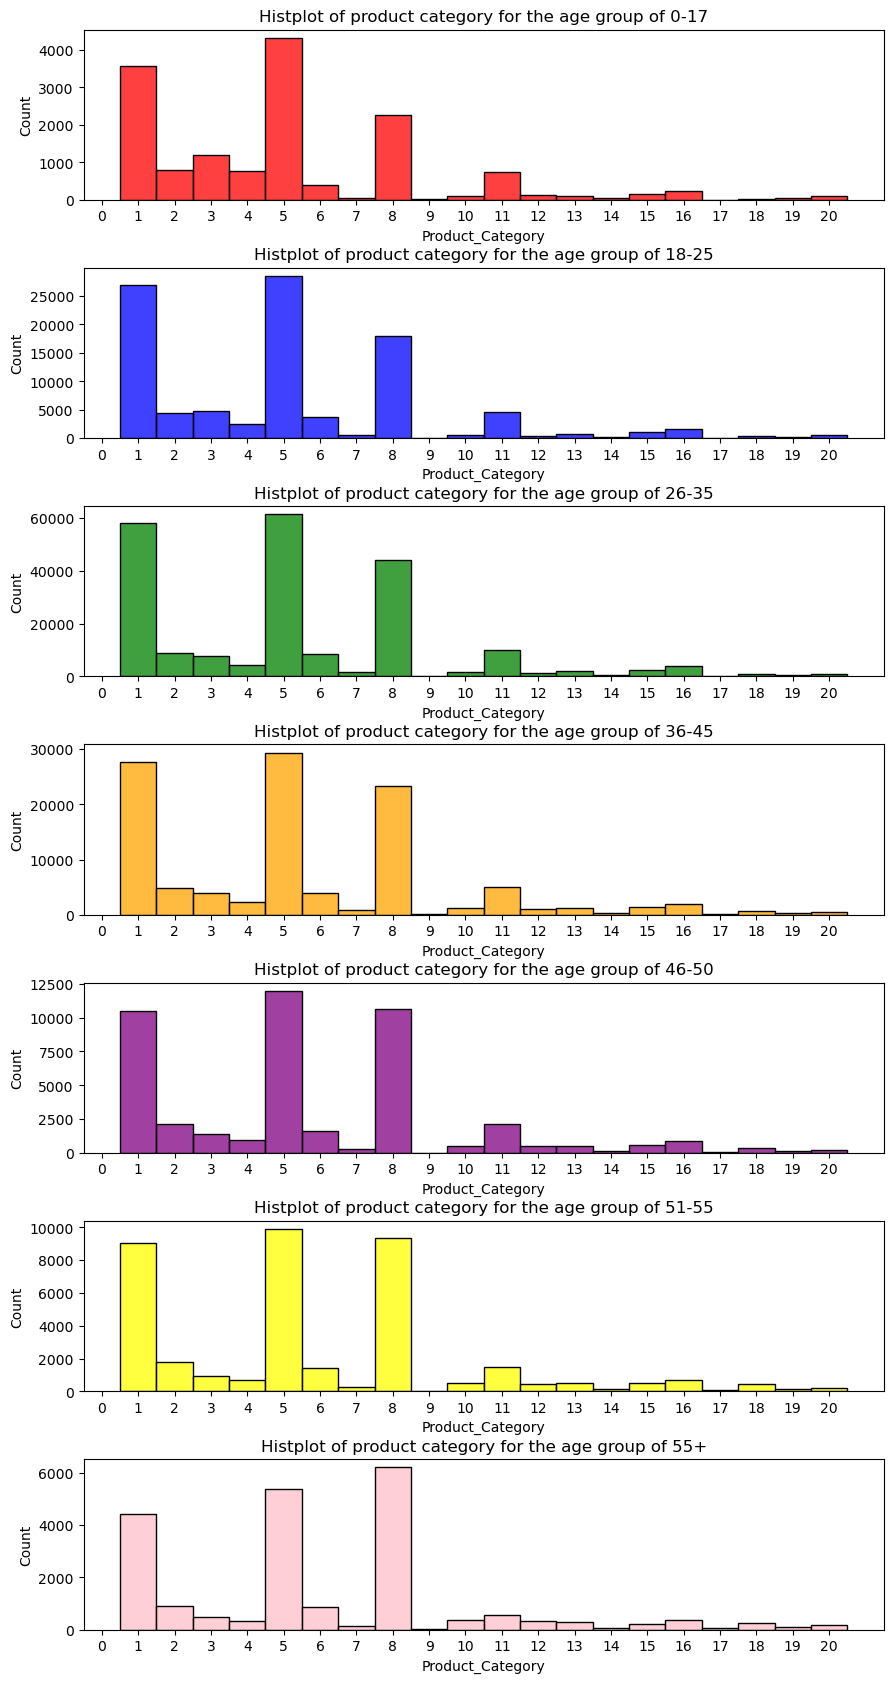

In [60]:
#Different histplots of product category based on age groups
fig,ax=plt.subplots(figsize=(10,20))

plt.subplot(7,1,1)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Age']=="0-17"],binwidth=1,color='red')
plt.title('Histplot of product category for the age group of 0-17')
plt.xticks(np.arange(0,21,1))

plt.subplot(7,1,2)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Age']=="18-25"],binwidth=1,color='blue')
plt.title('Histplot of product category for the age group of 18-25')
plt.xticks(np.arange(0,21,1))

plt.subplot(7,1,3)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Age']=="26-35"],binwidth=1,color='green')
plt.title('Histplot of product category for the age group of 26-35')
plt.xticks(np.arange(0,21,1))

plt.subplot(7,1,4)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Age']=="36-45"],binwidth=1,color='orange')
plt.title('Histplot of product category for the age group of 36-45')
plt.xticks(np.arange(0,21,1))

plt.subplot(7,1,5)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Age']=="46-50"],binwidth=1,color='purple')
plt.title('Histplot of product category for the age group of 46-50')
plt.xticks(np.arange(0,21,1))

plt.subplot(7,1,6)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Age']=="51-55"],binwidth=1,color='yellow')
plt.title('Histplot of product category for the age group of 51-55')
plt.xticks(np.arange(0,21,1))

plt.subplot(7,1,7)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Age']=="55+"],binwidth=1,color='pink')
plt.title('Histplot of product category for the age group of 55+')
plt.xticks(np.arange(0,21,1))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

<ins>Observations</ins>
- The top 3 most popular product categories across almost all age groups are 5, 1 and 8 (in descending order). For customers in the 50+ age group, the order of is 8, 5, and 1.

### Relationship between age, marital status, and the amount spent

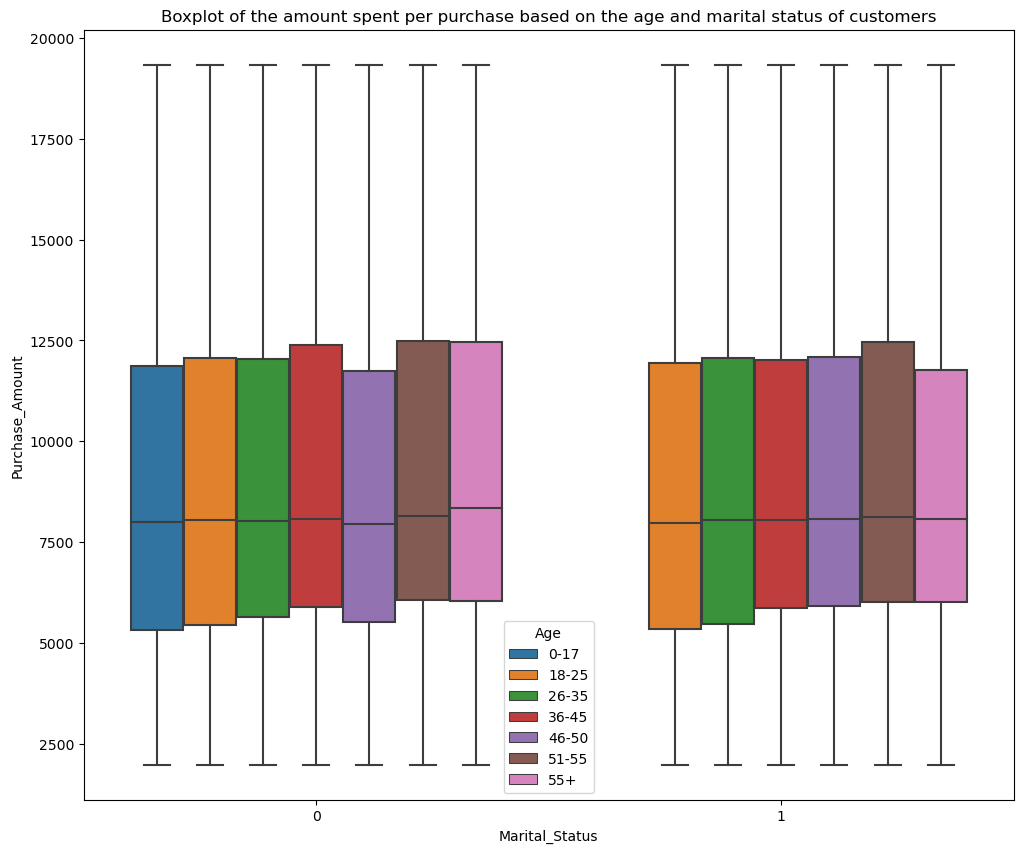

In [61]:
#Boxplot of the amount spent per purchase based on the age and marital status of customers
plt.figure(figsize=(12,10))
sns.boxplot(y='Purchase_Amount',data=walmart_data,x='Marital_Status',hue='Age')
plt.title("Boxplot of the amount spent per purchase based on the age and marital status of customers")
plt.show()

<ins>Observations</ins>
- Since no boxplot is plotted for the age group 0-17 under Marital_status=1, it can be concluded that Marital_status=1 represents unmarried customers and Marital_status=0 represents married customers.
- The minimum and maximum purchase amounts appear to the same across all the age groups, for both married and unmarried customers.
- There does not appear to be a drastic difference in the median purchase amounts across the different age groups, with the median amount for married customers being slightly higher as compared to their corresponding unmarried peers by age group.

### Preference of product categories based on gender

In [62]:
#Get the count of each combination of the Product_Category' and 'Age' variables
walmart_data[["Gender","Product_Category"]].value_counts()

Gender  Product_Category
M       1                   115547
        5                   108972
        8                    80367
F       5                    41961
        8                    33558
        1                    24831
M       11                   19548
        2                    18206
        6                    15907
        3                    14207
        4                     8114
        16                    7426
F       3                     6006
        2                     5658
M       15                    5244
F       11                    4739
        6                     4559
M       13                    4087
        10                    3963
F       4                     3639
M       7                     2778
        18                    2743
        12                    2415
F       16                    2402
M       20                    1827
F       12                    1532
        13                    1462
        10                    

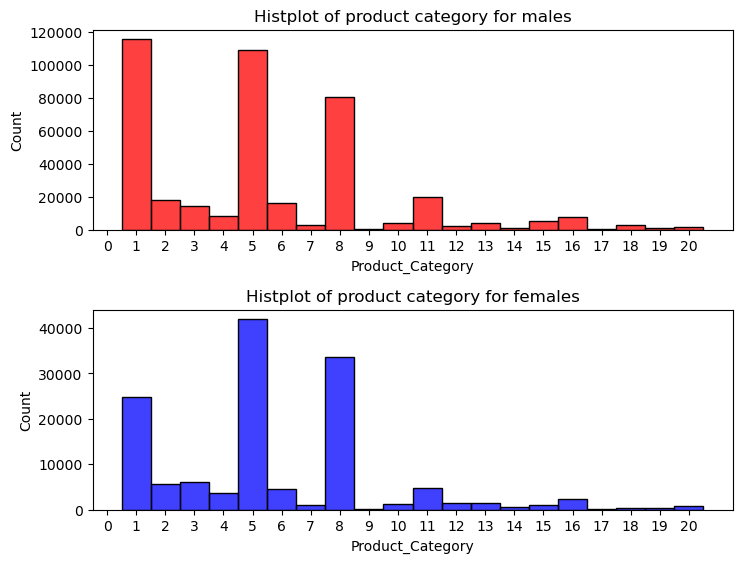

In [64]:
#Different histplots of product category based on gender
fig,ax=plt.subplots(figsize=(8,6))

plt.subplot(2,1,1)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Gender']=="M"],binwidth=1,color='red')
plt.title('Histplot of product category for males')
plt.xticks(np.arange(0,21,1))

plt.subplot(2,1,2)
sns.histplot(x='Product_Category',data=walmart_data[walmart_data['Gender']=="F"],binwidth=1,color='blue')
plt.title('Histplot of product category for females')
plt.xticks(np.arange(0,21,1))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

<ins>Observations</ins>
- Males dominate in terms of purchase volume across nearly all product categories.
- Males show a preference for Product Category 1, followed by 5 and 8.
- Females show a preference for Product Category 5, followed by 8 and 1.
- Males have notable purchases in categories 11, 2, 6, and 3, indicating a broader range of interests. Females also purchase from a variety of categories but in smaller volumes.

---

## 4. Studying the effect of gender on amount spent

In [69]:
#Get the unique categories for the 'gender' variable
walmart_data['Gender'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [72]:
#Seperate the purchase amounts for 'M' and 'F' categories
purchase_amount_M=walmart_data.loc[walmart_data['Gender']=='M','Purchase_Amount']
purchase_amount_F=walmart_data.loc[walmart_data['Gender']=='F','Purchase_Amount']

In [127]:
#Calculate the mean of each data set
mu_M=np.mean(purchase_amount_M)
mu_M

9427.240996574606

In [128]:
mu_F=np.mean(purchase_amount_F)
mu_F

8736.540266109021

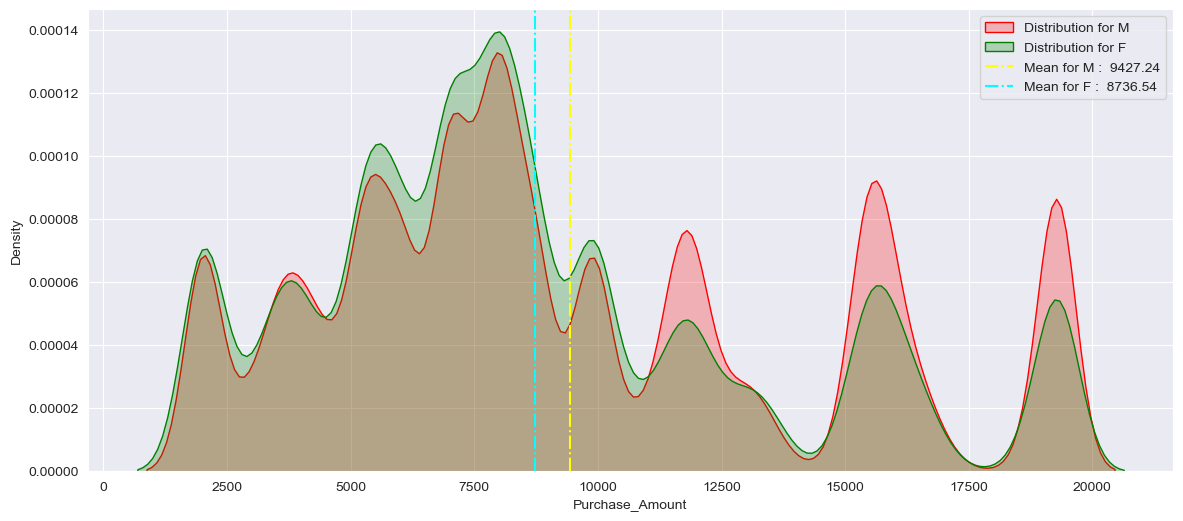

In [273]:
#Plot the density plot of the distribution of purchase amounts for male and female customers
plt.figure(figsize=(14, 6))
sns.kdeplot(data=purchase_amount_M,color="red",fill=True,label="Distribution for M")
sns.kdeplot(data=purchase_amount_F,color="green",fill=True,label="Distribution for F")
plt.axvline(mu_M, color = 'yellow', linestyle = 'dashdot',label="Mean for M :  {:.2f}".format(mu_M))
plt.axvline(mu_F, color = 'cyan', linestyle = 'dashdot',label="Mean for F :  {:.2f}".format(mu_F))
plt.legend(loc='upper right')
plt.show()

<ins>Observations</ins>
- The distributions of purchase amounts for both male and female customers present in the original data are non-normal.
- Both graphs show several peaks and valleys in purchase prices.
- There is not a great deal of difference in the probability densities at lower amounts. However, at higher amounts, there is a signficantly higher density of male customers than females.
- The mean purchase amount is higher for male customers than female customers.

### 95% bootstrap confidence interval for the average amount spent per gender

In [255]:
#Create a function used to construct a confidence interval for the purchase amount based on the gender variable
def CI_creator_gender(c,n_M,n_F,title_value):
    #Find significance level and critical value
    alpha=1-c
    tail_area=alpha/2
    cumulative_area=1-tail_area
    z_crit=norm.ppf(cumulative_area)
    
    #Create bootstrapped samples from the data and collect the means of each sample
    bts_means_M = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_M)
        bts_sample=np.random.choice(a=purchase_amount_M,size=n_M,replace=True)
        bts_means_M[rep]=np.mean(bts_sample)
        
    bts_means_F = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_F)
        bts_sample=np.random.choice(a=purchase_amount_F,size=n_F,replace=True)
        bts_means_F[rep]=np.mean(bts_sample)
        
    #Calculate the mean, standard deviation and standard error of the sampling distribution of sample means
    mu_means_M=np.mean(bts_means_M)
    sd_means_M=np.std(bts_means_M)
    
    mu_means_F=np.mean(bts_means_F)
    sd_means_F=np.std(bts_means_F)
    
    #Calculate the confidence intervals
    CI_M=(mu_means_M-z_crit*sd_means_M,mu_means_M+z_crit*sd_means_M)
    CI_F=(mu_means_F-z_crit*sd_means_F,mu_means_F+z_crit*sd_means_F)
    
    CI_plotter_gender(bts_means_M,bts_means_F,mu_means_M,mu_means_F,CI_M,CI_F,title_value)
    
    return [np.round(CI_M,2),np.round(CI_F,2)]
    

In [274]:
#Create a function to generate the plots of the sampling distributions and confidence intervals
def CI_plotter_gender(bts_means_M,bts_means_F,mu_means_M,mu_means_F,CI_M,CI_F,title_value):
    #Plot the density plot of the sampling distribution of average purchase amounts spent per gender
    plt.figure(figsize=(14, 8))
    plt.title(f"Sampling distributions and 95% confidence intervals for the average purchase spent by gender\n{title_value}")
    sns.kdeplot(data=bts_means_M,color="red",fill=True,label="Sampling distribution for M")
    sns.kdeplot(data=bts_means_F,color="green",fill=True,label="Sampling distribution for F")
    
    plt.xlabel("Purchase Amount")
    
    plt.axvline(mu_means_M, color = 'yellow', linestyle = 'dashdot',label="μ_means (M) :  {:.2f}".format(mu_means_M))
    plt.axvline(mu_means_F, color = 'cyan', linestyle = 'dashdot',label="μ_means (F) :  {:.2f}".format(mu_means_F))
    
    plt.axvline(CI_M[0], color = 'blue', linestyle = 'solid', 
                label="LCL(M):  {:.2f}\nUCL(M):   {:.2f}".format(CI_M[0],CI_M[1]))
    plt.axvline(CI_M[1], color = 'blue', linestyle = 'solid')
    
    plt.axvline(CI_F[0], color = 'orange', linestyle = 'solid', 
                label="LCL(F):  {:.2f}\nUCL(F):   {:.2f}".format(CI_F[0],CI_F[1]))
    plt.axvline(CI_F[1], color = 'orange', linestyle = 'solid')
     
    plt.legend(loc='upper right')
    plt.show()

#### 95% confidence intervals for the average amount spent per gender (entire dataset)

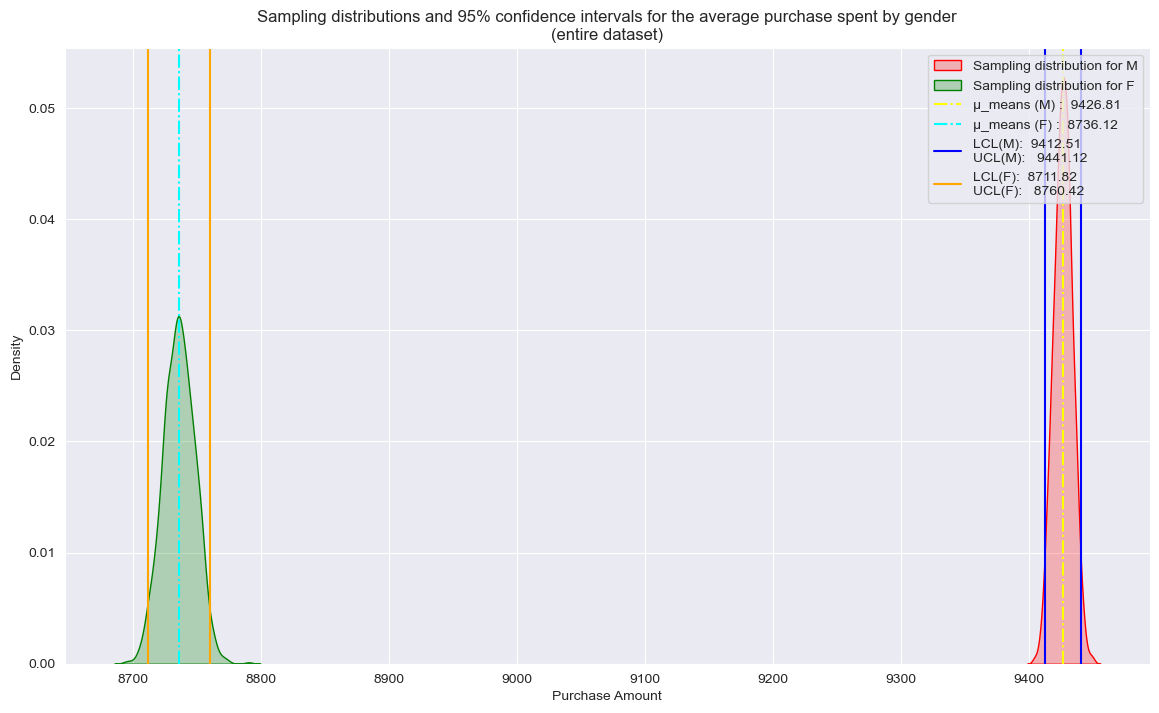

In [275]:
CI_M,CI_F=CI_creator_gender(0.95,len(purchase_amount_M),len(purchase_amount_F),"(entire dataset)")

In [276]:
CI_summary=pd.DataFrame(data={
    'Gender':['M','F'],
    'Confidence Interval':[CI_M,CI_F],
    'Center of CI':[(CI_M[0]+CI_M[1])/2,(CI_F[0]+CI_F[1])/2],
    'Width of CI':[CI_M[1]-CI_M[0],CI_F[1]-CI_F[0]]
})
CI_summary.set_index('Gender', inplace=True)
CI_summary

,Confidence Interval,Center of CI,Width of CI
Gender,,,
M,"[9412.51, 9441.12]",9426.815,28.61
F,"[8711.82, 8760.42]",8736.120,48.60


<ins>Observations</ins>
- The confidence interval computed using the entire dataset is wider for females than males. This indicates that there is greater variability in the purchase amounts for females as compared to males.
- The mean of the sampling distribution is much higher for males than females. This means that male customers spend a lot more on average, as compared to female customers.

#### 95% confidence intervals for the average amount spent per gender (smaller sample sizes, n=300, 3000, 30000)

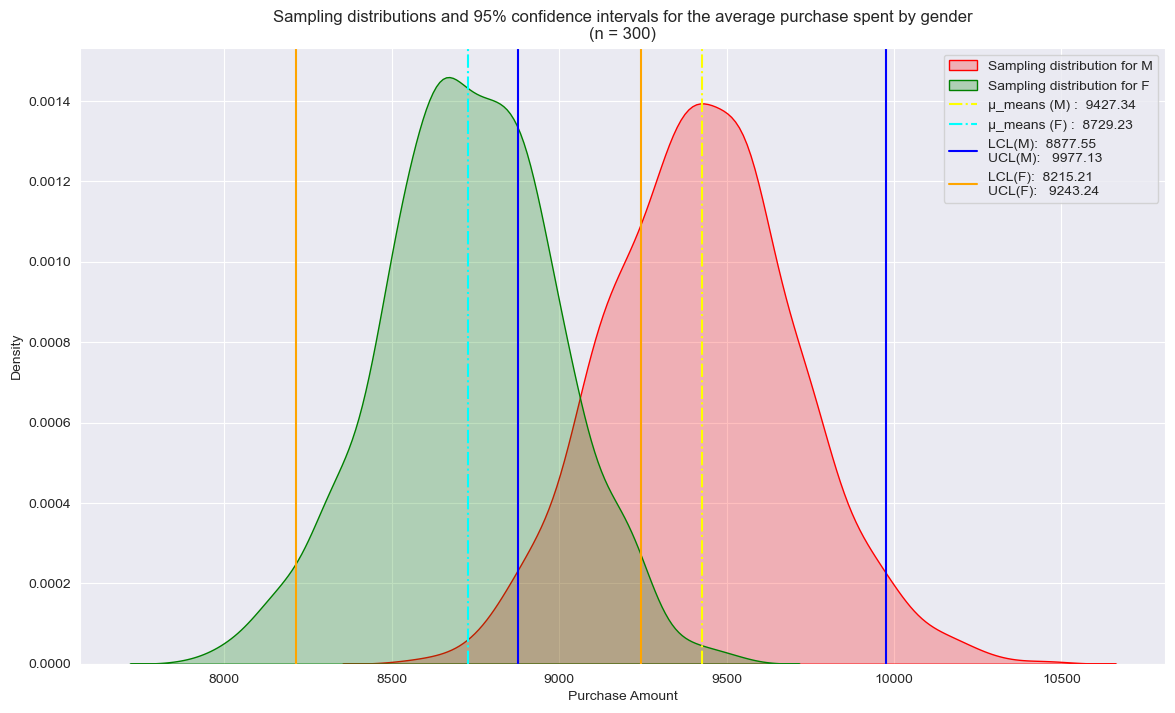

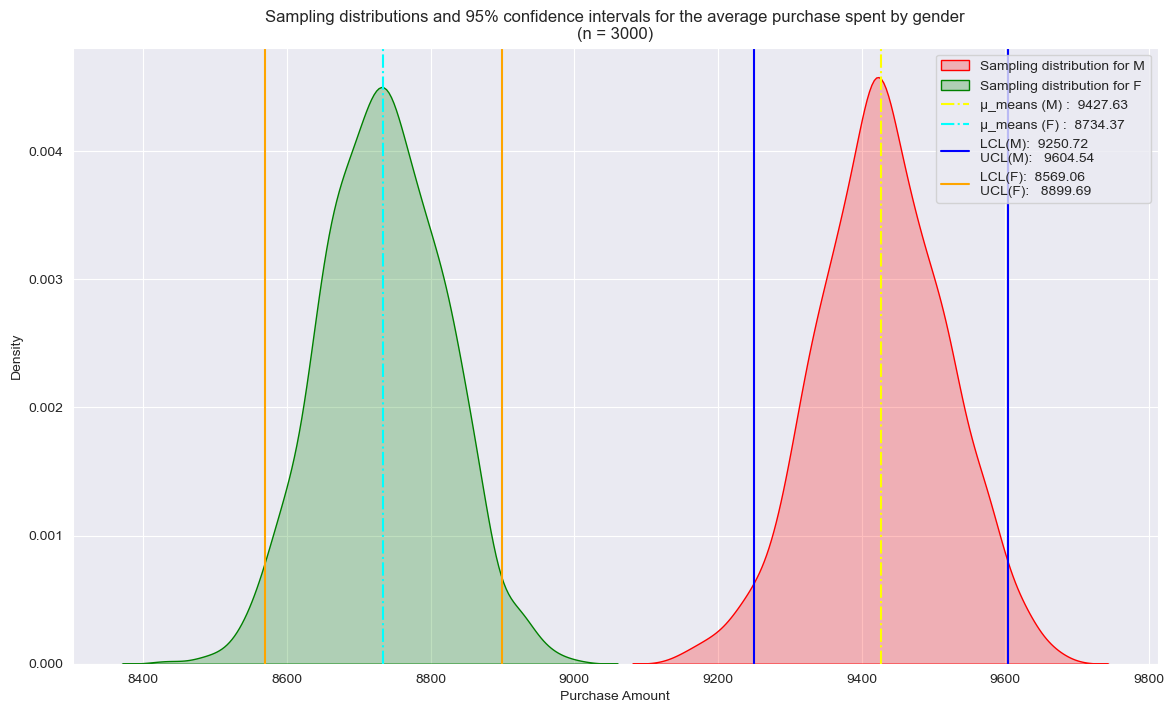

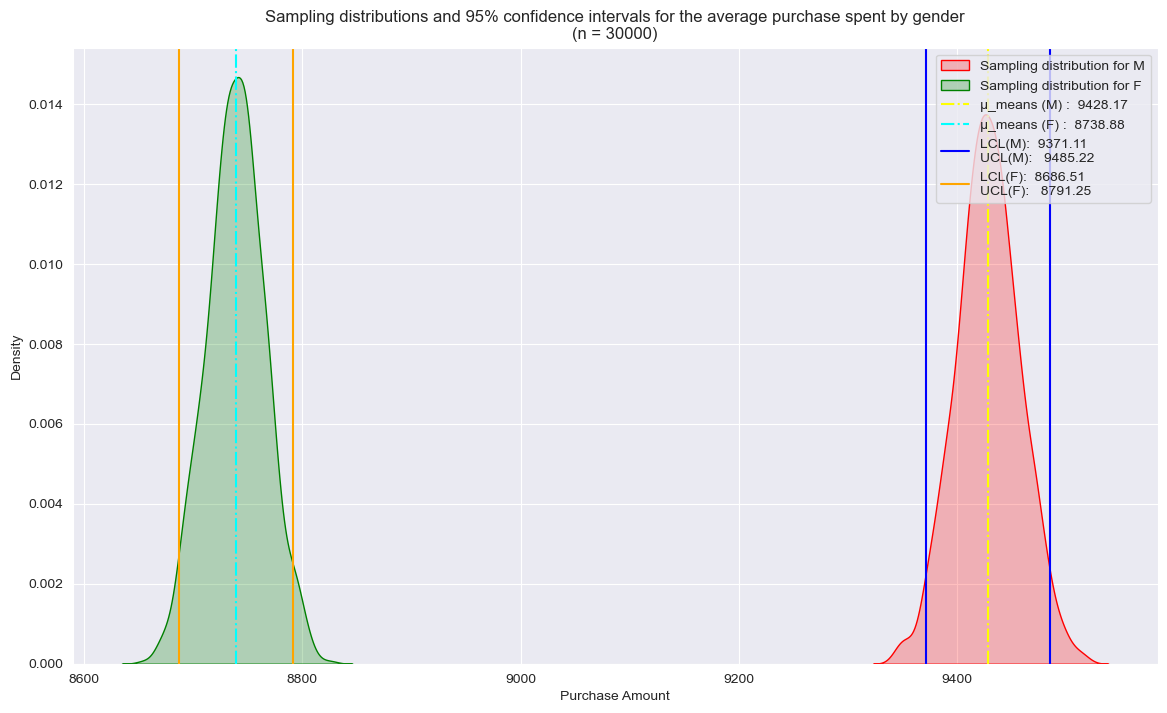

In [277]:
CI_M_300,CI_F_300=CI_creator_gender(0.95,300,300,"(n = 300)")
CI_M_3000,CI_F_3000=CI_creator_gender(0.95,3000,3000,"(n = 3000)")
CI_M_30000,CI_F_30000=CI_creator_gender(0.95,30000,30000,"(n = 30000)")

In [278]:
CI_summary=pd.DataFrame(data={
    'n':[300,300,3000,3000,30000,30000],
    'Gender':['M','F','M','F','M','F'],
    'Confidence Interval':[CI_M_300,CI_F_300,CI_M_3000,CI_F_3000,CI_M_30000,CI_F_30000],
    'Center of CI':[(CI_M_300[0]+CI_M_300[1])/2,(CI_F_300[0]+CI_F_300[1])/2,
                    (CI_M_3000[0]+CI_M_3000[1])/2,(CI_F_3000[0]+CI_F_3000[1])/2,
                    (CI_M_30000[0]+CI_M_30000[1])/2,(CI_F_30000[0]+CI_F_30000[1])/2],
    'Width of CI':[CI_M_300[1]-CI_M_300[0],CI_F_300[1]-CI_F_300[0],
                  CI_M_3000[1]-CI_M_3000[0],CI_F_3000[1]-CI_F_3000[0],
                  CI_M_30000[1]-CI_M_30000[0],CI_F_30000[1]-CI_F_30000[0]]
})
CI_summary.set_index(['n','Gender'],inplace=True)
CI_summary

Confidence Interval  Center of CI  Width of CI
n     Gender                                               
300   M       [8877.55, 9977.13]      9427.340      1099.58
      F       [8215.21, 9243.24]      8729.225      1028.03
3000  M       [9250.72, 9604.54]      9427.630       353.82
      F       [8569.06, 8899.69]      8734.375       330.63
30000 M       [9371.11, 9485.22]      9428.165       114.11
      F       [8686.51, 8791.25]      8738.880       104.74

<ins>Observations</ins>
- It can be observed that the widths of the confidence intervals decreas with increase in the sample size. This is because the standard error of the means reduces.
- The confidence intervals for the average amount spent by males and females overlaps for smaller sample sizes (n=300), but does not overlap for larger sample sizes (n=3000, 30000). This is due to the decrease in the standard error with increase in sample size which causes the confidence intervals to become more compact. A more compact interval is more precise. When precise confidence intervals do not overlap, it is a good indicator that the difference in means is significant.
- It is observed that with increase in the sample size, the shape of the sampling distributions of means becomes more and more like a crisp normal (bell-shaped) curve, with fewer and fewer distortions. Further, the variability in the distributions decreases as the sample size increases.

---

## 5. Studying the effect of marital status on amount spent

In [295]:
#Get the unique categories for the 'Marital_Status' variable
walmart_data['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [296]:
#Seperate the purchase amounts for each category
purchase_amount_Married=walmart_data.loc[walmart_data['Marital_Status']==0,'Purchase_Amount']
purchase_amount_Unmarried=walmart_data.loc[walmart_data['Marital_Status']==1,'Purchase_Amount']

In [297]:
#Calculate the mean of each data set
mu_Married=np.mean(purchase_amount_Married)
mu_Married

9258.820463706883

In [298]:
mu_Unmarried=np.mean(purchase_amount_Unmarried)
mu_Unmarried

9253.669823420034

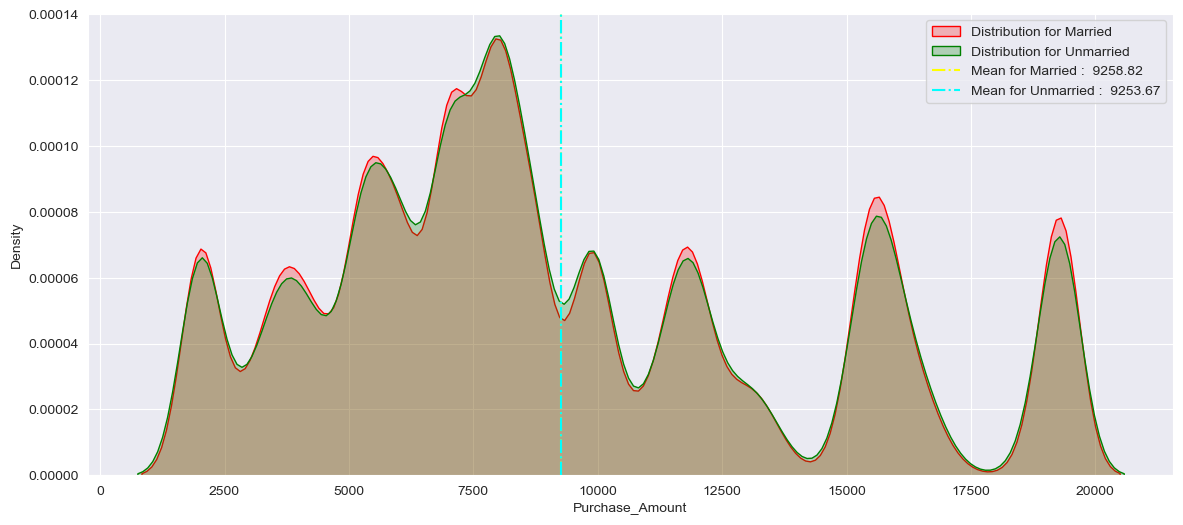

In [299]:
#Plot the density plot of the distribution of purchase amounts for married and unmarried customers
plt.figure(figsize=(14, 6))
sns.kdeplot(data=purchase_amount_Married,color="red",fill=True,label="Distribution for Married")
sns.kdeplot(data=purchase_amount_Unmarried,color="green",fill=True,label="Distribution for Unmarried")
plt.axvline(mu_Married, color = 'yellow', linestyle = 'dashdot',label="Mean for Married :  {:.2f}".format(mu_Married))
plt.axvline(mu_Unmarried, color = 'cyan', linestyle = 'dashdot',label="Mean for Unmarried :  {:.2f}".format(mu_Unmarried))
plt.legend(loc='upper right')
plt.show()

<ins>Observations</ins>
- The distributions of purchase amounts for both married and unmarried customers present in the original data are non-normal.
- Both graphs show several peaks and valleys in purchase prices.
- The density plots of the purchase amounts for married and unmarried customers are almost identical.
- The mean purchase amounts for both married and unmarried customers coincide.

### 95% bootstrap confidence interval for the average amount spent by marital status

In [300]:
#Create a function used to construct a confidence interval for the purchase amount based on the Marital_Status variable
def CI_creator_maritalstatus(c,n_Married,n_Unmarried,title_value):
    #Find significance level and critical value
    alpha=1-c
    tail_area=alpha/2
    cumulative_area=1-tail_area
    z_crit=norm.ppf(cumulative_area)
    
    #Create bootstrapped samples from the data and collect the means of each sample
    bts_means_Married = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_Married)
        bts_sample=np.random.choice(a=purchase_amount_Married,size=n_Married,replace=True)
        bts_means_Married[rep]=np.mean(bts_sample)
        
    bts_means_Unmarried = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_Unmarried)
        bts_sample=np.random.choice(a=purchase_amount_Unmarried,size=n_Unmarried,replace=True)
        bts_means_Unmarried[rep]=np.mean(bts_sample)
        
    #Calculate the mean, standard deviation and standard error of the sampling distribution of sample means
    mu_means_Married=np.mean(bts_means_Married)
    sd_means_Married=np.std(bts_means_Married)
    
    mu_means_Unmarried=np.mean(bts_means_Unmarried)
    sd_means_Unmarried=np.std(bts_means_Unmarried)
    
    #Calculate the confidence intervals
    CI_Married=(mu_means_Married-z_crit*sd_means_Married,mu_means_Married+z_crit*sd_means_Married)
    CI_Unmarried=(mu_means_Unmarried-z_crit*sd_means_Unmarried,mu_means_Unmarried+z_crit*sd_means_Unmarried)
    
    CI_plotter_maritalstatus(bts_means_Married,bts_means_Unmarried,mu_means_Married,mu_means_Unmarried,CI_Married,CI_Unmarried,title_value)
    
    return [np.round(CI_Married,2),np.round(CI_Unmarried,2)]
    

In [301]:
#Create a function to generate the plots of the sampling distributions and confidence intervals
def CI_plotter_maritalstatus(bts_means_Married,bts_means_Unmarried,mu_means_Married,mu_means_Unmarried,CI_Married,CI_Unmarried,title_value):
    #Plot the density plot of the sampling distribution of average purchase amounts spent based on marital status
    plt.figure(figsize=(14, 8))
    plt.title(f"Sampling distributions and 95% confidence intervals for the average purchase spent by marital status\n{title_value}")
    sns.kdeplot(data=bts_means_Married,color="red",fill=True,label="Sampling distribution for Married")
    sns.kdeplot(data=bts_means_Unmarried,color="green",fill=True,label="Sampling distribution for Unmarried")
    
    plt.xlabel("Purchase Amount")
    
    plt.axvline(mu_means_Married, color = 'yellow', linestyle = 'dashdot',label="μ_means (Married) :  {:.2f}".format(mu_means_Married))
    plt.axvline(mu_means_Unmarried, color = 'cyan', linestyle = 'dashdot',label="μ_means (Unmarried) :  {:.2f}".format(mu_means_Unmarried))
    
    plt.axvline(CI_Married[0], color = 'blue', linestyle = 'solid', 
                label="LCL(Married):  {:.2f}\nUCL(Married):   {:.2f}".format(CI_Married[0],CI_Married[1]))
    plt.axvline(CI_Married[1], color = 'blue', linestyle = 'solid')
    
    plt.axvline(CI_Unmarried[0], color = 'orange', linestyle = 'solid', 
                label="LCL(Unmarried):  {:.2f}\nUCL(Unmarried):   {:.2f}".format(CI_Unmarried[0],CI_Unmarried[1]))
    plt.axvline(CI_Unmarried[1], color = 'orange', linestyle = 'solid')
     
    plt.legend(loc='upper right')
    plt.show()

#### 95% confidence intervals for the average amount spent per marital status (entire dataset)

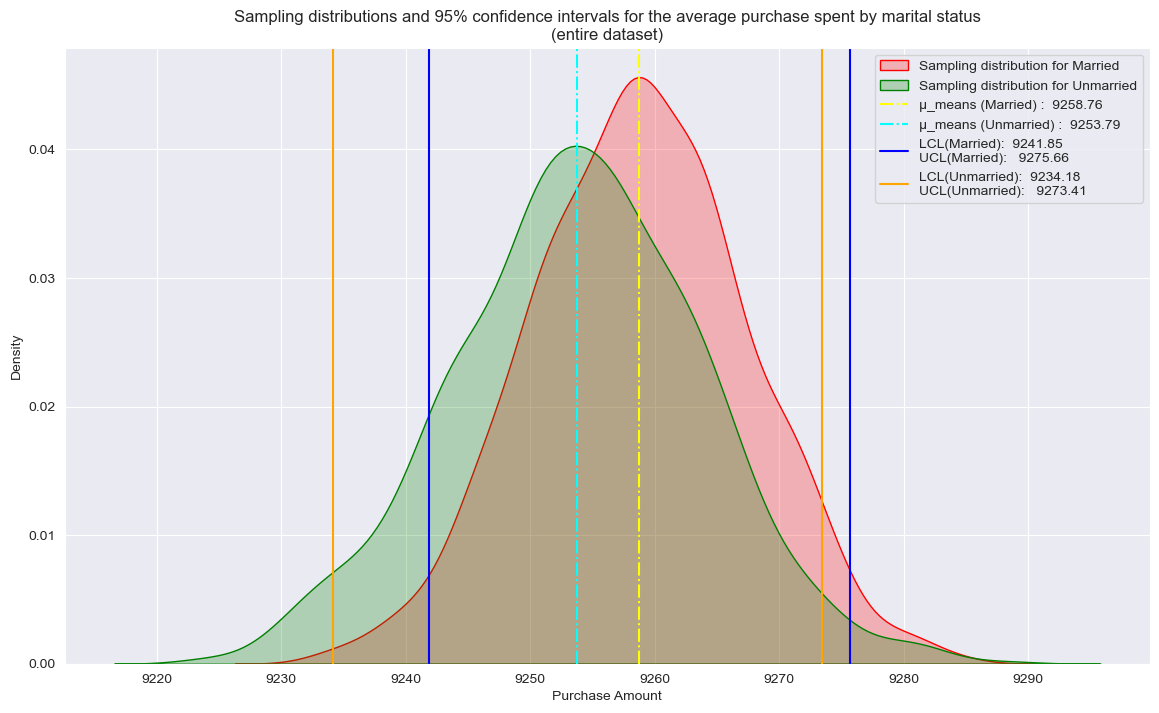

In [302]:
CI_Married,CI_Unmarried=CI_creator_maritalstatus(0.95,len(purchase_amount_Married),len(purchase_amount_Unmarried),
                                                 "(entire dataset)")

In [303]:
CI_summary=pd.DataFrame(data={
    'Marital Status':['Married','Unmarried'],
    'Confidence Interval':[CI_Married,CI_Unmarried],
    'Center of CI':[(CI_Married[0]+CI_Married[1])/2,(CI_Unmarried[0]+CI_Unmarried[1])/2],
    'Width of CI':[CI_Married[1]-CI_Married[0],CI_Unmarried[1]-CI_Unmarried[0]]
})
CI_summary.set_index('Marital Status', inplace=True)
CI_summary

,Confidence Interval,Center of CI,Width of CI
Marital Status,,,
Married,"[9241.85, 9275.66]",9258.755,33.81
Unmarried,"[9234.18, 9273.41]",9253.795,39.23


<ins>Observations</ins>
- The confidence interval computed using the entire dataset is wider for unmarried customers than married customers. This indicates that there is greater variability in the purchase amounts for unmarried customers as compared to married ones.
- The mean of the sampling distribution is slightly higher for married customers than unmarried ones. However, this difference in unlikely to be signficant since the sampling distributions overlap considerably.

#### 95% confidence intervals for the average amount spent by marital status (smaller sample sizes, n=300, 3000, 30000)

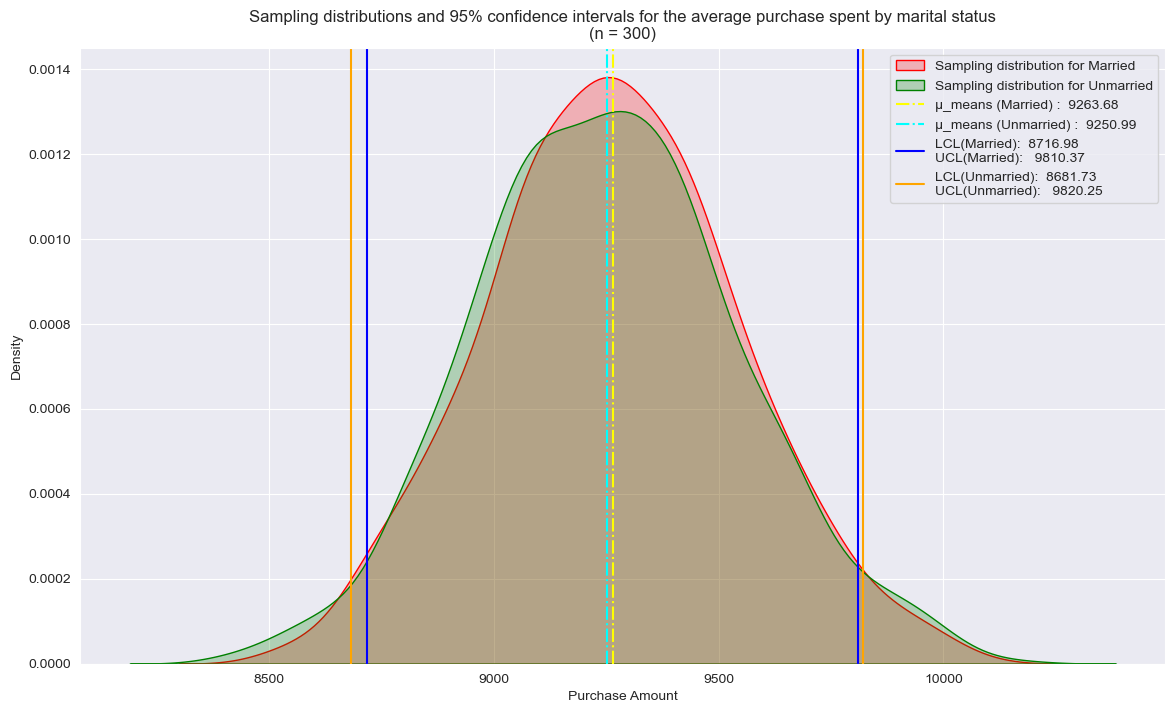

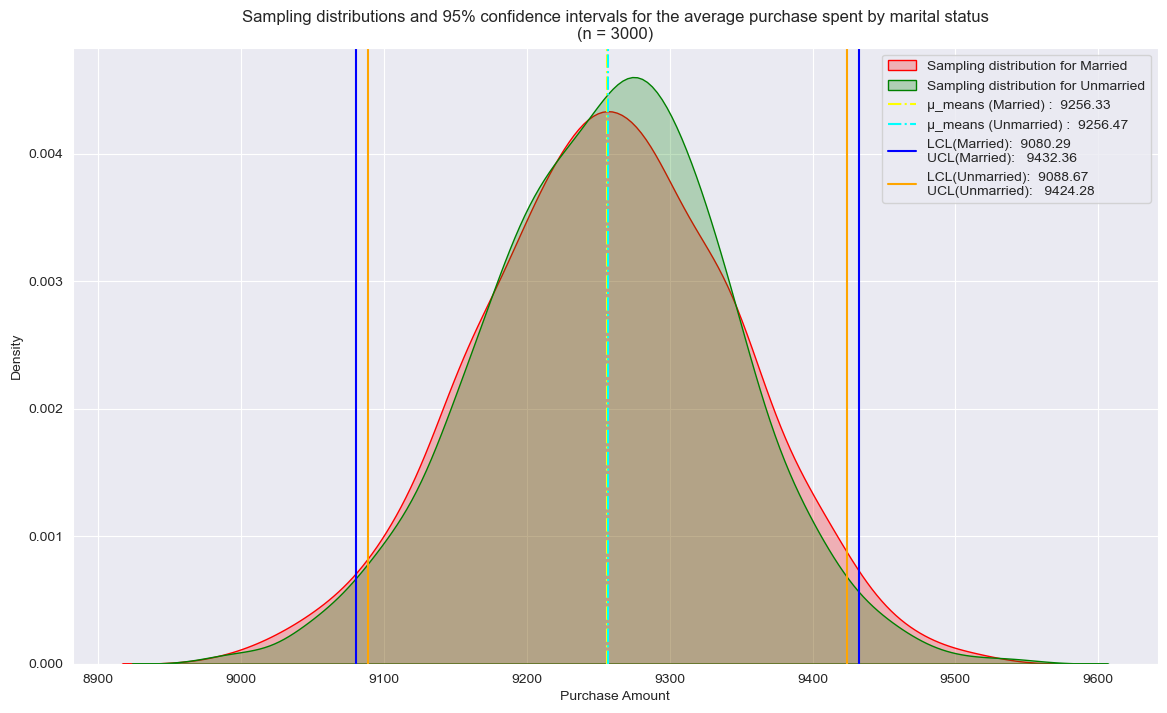

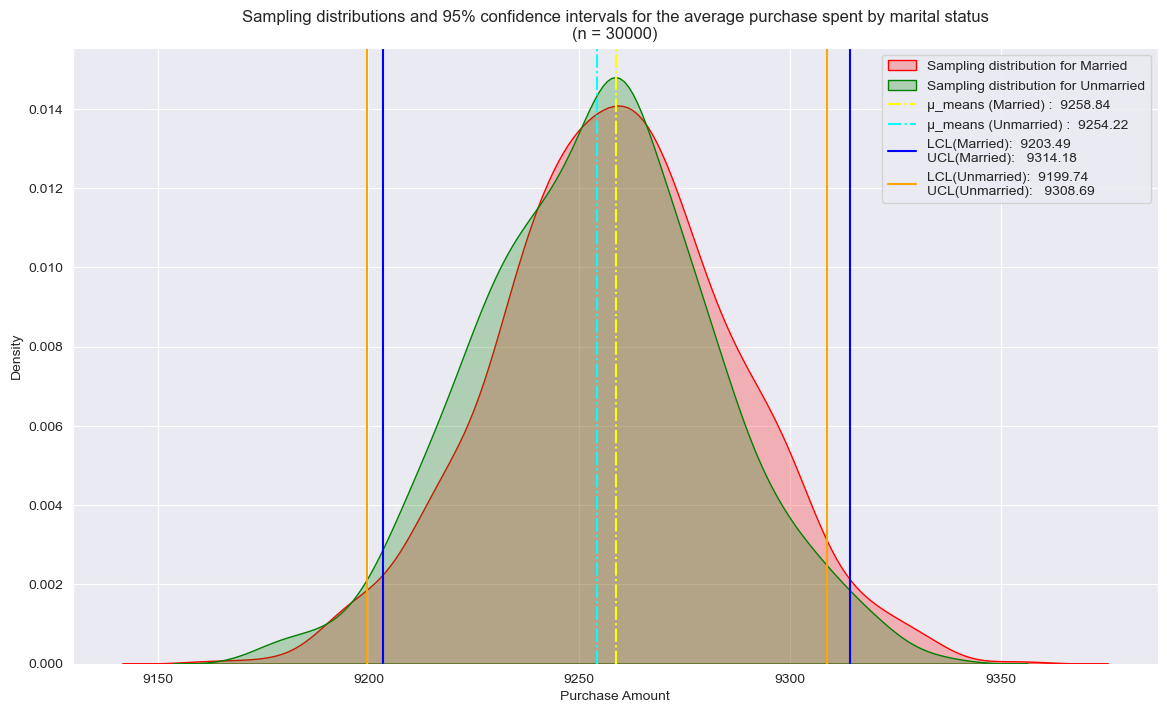

In [304]:
CI_Married_300,CI_Unmarried_300=CI_creator_maritalstatus(0.95,300,300,"(n = 300)")
CI_Married_3000,CI_Unmarried_3000=CI_creator_maritalstatus(0.95,3000,3000,"(n = 3000)")
CI_Married_30000,CI_Unmarried_30000=CI_creator_maritalstatus(0.95,30000,30000,"(n = 30000)")

In [305]:
CI_summary=pd.DataFrame(data={
    'n':[300,300,3000,3000,30000,30000],
    'Marital Status':['Married','Unmarried','Married','Unmarried','Married','Unmarried'],
    'Confidence Interval':[CI_Married_300,CI_Unmarried_300,CI_Married_3000,CI_Unmarried_3000,CI_Married_30000,CI_Unmarried_30000],
    'Center of CI':[(CI_Married_300[0]+CI_Married_300[1])/2,(CI_Unmarried_300[0]+CI_Unmarried_300[1])/2,
                    (CI_Married_3000[0]+CI_Married_3000[1])/2,(CI_Unmarried_3000[0]+CI_Unmarried_3000[1])/2,
                    (CI_Married_30000[0]+CI_Married_30000[1])/2,(CI_Unmarried_30000[0]+CI_Unmarried_30000[1])/2],
    'Width of CI':[CI_Married_300[1]-CI_Married_300[0],CI_Unmarried_300[1]-CI_Unmarried_300[0],
                  CI_Married_3000[1]-CI_Married_3000[0],CI_Unmarried_3000[1]-CI_Unmarried_3000[0],
                  CI_Married_30000[1]-CI_Married_30000[0],CI_Unmarried_30000[1]-CI_Unmarried_30000[0]]
})
CI_summary.set_index(['n','Marital Status'],inplace=True)
CI_summary

Confidence Interval  Center of CI  Width of CI
n     Marital Status                                               
300   Married         [8716.98, 9810.37]      9263.675      1093.39
      Unmarried       [8681.73, 9820.25]      9250.990      1138.52
3000  Married         [9080.29, 9432.36]      9256.325       352.07
      Unmarried       [9088.67, 9424.28]      9256.475       335.61
30000 Married         [9203.49, 9314.18]      9258.835       110.69
      Unmarried       [9199.74, 9308.69]      9254.215       108.95

<ins>Observations</ins>
- It can be observed that the widths of the confidence intervals decrease with increase in the sample size. This is because the standard error of the means reduces.
- The confidence intervals for the average amount spent by married and unmarried customers overlap at all samples sizes. This indicates that there is no signficant difference in the average purchase amounts based on marital status. 
- It is observed that with increase in the sample size, the shape of the sampling distributions of means becomes more and more like a crisp normal (bell-shaped) curve, with fewer and fewer distortions. Further, the variability in the distributions decreases as the sample size increases.

---

## 6. Studying the effect of age on amount spent

In [307]:
#Get the unique categories for the 'Age' variable
walmart_data['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [308]:
#Seperate the purchase amounts for the different age groups
purchase_amount_0_17=walmart_data.loc[walmart_data['Age']=='0-17','Purchase_Amount']
purchase_amount_18_25=walmart_data.loc[walmart_data['Age']=='18-25','Purchase_Amount']
purchase_amount_26_35=walmart_data.loc[walmart_data['Age']=='26-35','Purchase_Amount']
purchase_amount_36_45=walmart_data.loc[walmart_data['Age']=='36-45','Purchase_Amount']
purchase_amount_46_50=walmart_data.loc[walmart_data['Age']=='46-50','Purchase_Amount']
purchase_amount_51_55=walmart_data.loc[walmart_data['Age']=='51-55','Purchase_Amount']
purchase_amount_55plus=walmart_data.loc[walmart_data['Age']=='55+','Purchase_Amount']

In [310]:
#Calculate the mean of each data set
mu_0_17=np.mean(purchase_amount_0_17)
mu_0_17

8940.64905310555

In [311]:
mu_18_25=np.mean(purchase_amount_18_25)
mu_18_25

9169.010977322898

In [312]:
mu_26_35=np.mean(purchase_amount_26_35)
mu_26_35

9243.780119041656

In [313]:
mu_36_45=np.mean(purchase_amount_36_45)
mu_36_45

9322.92190922891

In [314]:
mu_46_50=np.mean(purchase_amount_46_50)
mu_46_50

9204.211483337345

In [315]:
mu_51_55=np.mean(purchase_amount_51_55)
mu_51_55

9514.863250305187

In [316]:
mu_55plus=np.mean(purchase_amount_55plus)
mu_55plus

9327.796549479166

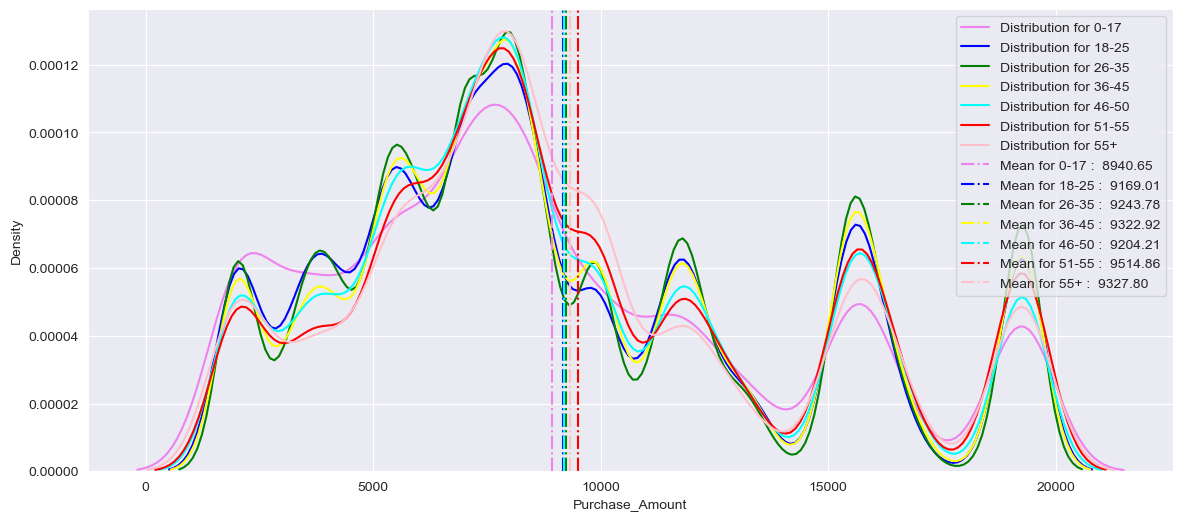

In [319]:
#Plot the density plot of the distribution of purchase amounts for all age groups
plt.figure(figsize=(14, 6))

sns.kdeplot(data=purchase_amount_0_17,color="violet",fill=False,label="Distribution for 0-17")
sns.kdeplot(data=purchase_amount_18_25,color="blue",fill=False,label="Distribution for 18-25")
sns.kdeplot(data=purchase_amount_26_35,color="green",fill=False,label="Distribution for 26-35")
sns.kdeplot(data=purchase_amount_36_45,color="yellow",fill=False,label="Distribution for 36-45")
sns.kdeplot(data=purchase_amount_46_50,color="cyan",fill=False,label="Distribution for 46-50")
sns.kdeplot(data=purchase_amount_51_55,color="red",fill=False,label="Distribution for 51-55")
sns.kdeplot(data=purchase_amount_55plus,color="pink",fill=False,label="Distribution for 55+")

plt.axvline(mu_0_17, color = 'violet', linestyle = 'dashdot',label="Mean for 0-17 :  {:.2f}".format(mu_0_17))
plt.axvline(mu_18_25, color = 'blue', linestyle = 'dashdot',label="Mean for 18-25 :  {:.2f}".format(mu_18_25))
plt.axvline(mu_26_35, color = 'green', linestyle = 'dashdot',label="Mean for 26-35 :  {:.2f}".format(mu_26_35))
plt.axvline(mu_36_45, color = 'yellow', linestyle = 'dashdot',label="Mean for 36-45 :  {:.2f}".format(mu_36_45))
plt.axvline(mu_46_50, color = 'cyan', linestyle = 'dashdot',label="Mean for 46-50 :  {:.2f}".format(mu_46_50))
plt.axvline(mu_51_55, color = 'red', linestyle = 'dashdot',label="Mean for 51-55 :  {:.2f}".format(mu_51_55))
plt.axvline(mu_55plus, color = 'pink', linestyle = 'dashdot',label="Mean for 55+ :  {:.2f}".format(mu_55plus))

plt.legend(loc='upper right')
plt.show()

<ins>Observations</ins>
- The distributions of purchase amounts for all age groups of customers present in the original data are non-normal.
- Both graphs show several peaks and valleys in purchase prices.
- At lower purchase amounts, there appears to be a higher density of customers in the 0-17 age group. However, the density of these younger customers decreases for higher purchase amounts. Customers in the younger and working age groups of 18-25, 26-35 and 36-55 appear to have consitently high probability densities across the entire distribution. 
- The mean purchase amount is highest for customers in the 51-55 age group and lowest for those in the 0-17 age group.

### 95% bootstrap confidence interval for the average amount spent by age group

In [322]:
#Create a function used to construct a confidence interval for the purchase amount by age group
def CI_creator_age(c,n_0_17,n_18_25,n_26_35,n_36_45,n_46_50,n_51_55,n_55plus,title_value):
    #Find significance level and critical value
    alpha=1-c
    tail_area=alpha/2
    cumulative_area=1-tail_area
    z_crit=norm.ppf(cumulative_area)
    
    #Create bootstrapped samples from the data and collect the means of each sample
    bts_means_0_17 = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_0_17)
        bts_sample=np.random.choice(a=purchase_amount_0_17,size=n_0_17,replace=True)
        bts_means_0_17[rep]=np.mean(bts_sample)
        
    bts_means_18_25 = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_18_25)
        bts_sample=np.random.choice(a=purchase_amount_18_25,size=n_18_25,replace=True)
        bts_means_18_25[rep]=np.mean(bts_sample)
    
    bts_means_26_35 = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_26_35)
        bts_sample=np.random.choice(a=purchase_amount_26_35,size=n_26_35,replace=True)
        bts_means_26_35[rep]=np.mean(bts_sample)
        
    bts_means_36_45 = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_36_45)
        bts_sample=np.random.choice(a=purchase_amount_36_45,size=n_36_45,replace=True)
        bts_means_36_45[rep]=np.mean(bts_sample)
        
    bts_means_46_50 = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_46_50)
        bts_sample=np.random.choice(a=purchase_amount_46_50,size=n_46_50,replace=True)
        bts_means_46_50[rep]=np.mean(bts_sample)
        
    bts_means_51_55 = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_51_55)
        bts_sample=np.random.choice(a=purchase_amount_51_55,size=n_51_55,replace=True)
        bts_means_51_55[rep]=np.mean(bts_sample)
        
    bts_means_55plus = np.empty(1000)
    for rep in range(1000):
        bts_sample=np.empty(n_55plus)
        bts_sample=np.random.choice(a=purchase_amount_55plus,size=n_55plus,replace=True)
        bts_means_55plus[rep]=np.mean(bts_sample)
        
    #Calculate the mean, standard deviation and standard error of the sampling distribution of sample means
    mu_means_0_17=np.mean(bts_means_0_17)
    sd_means_0_17=np.std(bts_means_0_17)
    
    mu_means_18_25=np.mean(bts_means_18_25)
    sd_means_18_25=np.std(bts_means_18_25)
    
    mu_means_26_35=np.mean(bts_means_26_35)
    sd_means_26_35=np.std(bts_means_26_35)
    
    mu_means_36_45=np.mean(bts_means_36_45)
    sd_means_36_45=np.std(bts_means_36_45)
    
    mu_means_46_50=np.mean(bts_means_46_50)
    sd_means_46_50=np.std(bts_means_46_50)
    
    mu_means_51_55=np.mean(bts_means_51_55)
    sd_means_51_55=np.std(bts_means_51_55)
    
    mu_means_55plus=np.mean(bts_means_55plus)
    sd_means_55plus=np.std(bts_means_55plus)
    
    #Calculate the confidence intervals
    CI_0_17=(mu_means_0_17-z_crit*sd_means_0_17,mu_means_0_17+z_crit*sd_means_0_17)
    CI_18_25=(mu_means_18_25-z_crit*sd_means_18_25,mu_means_18_25+z_crit*sd_means_18_25)
    CI_26_35=(mu_means_26_35-z_crit*sd_means_26_35,mu_means_26_35+z_crit*sd_means_26_35)
    CI_36_45=(mu_means_36_45-z_crit*sd_means_36_45,mu_means_36_45+z_crit*sd_means_36_45)
    CI_46_50=(mu_means_46_50-z_crit*sd_means_46_50,mu_means_46_50+z_crit*sd_means_46_50)
    CI_51_55=(mu_means_51_55-z_crit*sd_means_51_55,mu_means_51_55+z_crit*sd_means_51_55)
    CI_55plus=(mu_means_55plus-z_crit*sd_means_55plus,mu_means_55plus+z_crit*sd_means_55plus)
    
    CI_plotter_age(bts_means_0_17,bts_means_18_25,bts_means_26_35,bts_means_36_45,bts_means_46_50,bts_means_51_55,bts_means_55plus,
                   mu_means_0_17,mu_means_18_25,mu_means_26_35,mu_means_36_45,mu_means_46_50,mu_means_51_55,mu_means_55plus,
                   CI_0_17,CI_18_25,CI_26_35,CI_36_45,CI_46_50,CI_51_55,CI_55plus,
                   title_value)
    
    return [np.round(CI_0_17,2),np.round(CI_18_25,2),np.round(CI_26_35,2),np.round(CI_36_45,2),
            np.round(CI_46_50,2),np.round(CI_51_55,2),np.round(CI_55plus,2)]
    

In [324]:
#Create a function to generate the plots of the sampling distributions and confidence intervals
def CI_plotter_age(bts_means_0_17,bts_means_18_25,bts_means_26_35,bts_means_36_45,bts_means_46_50,bts_means_51_55,bts_means_55plus,
                   mu_means_0_17,mu_means_18_25,mu_means_26_35,mu_means_36_45,mu_means_46_50,mu_means_51_55,mu_means_55plus,
                   CI_0_17,CI_18_25,CI_26_35,CI_36_45,CI_46_50,CI_51_55,CI_55plus,
                   title_value):
    
    #Plot the density plot of the sampling distribution of average purchase amounts spent by age group
    plt.figure(figsize=(14, 8))
    
    plt.title(f"Sampling distributions and 95% confidence intervals for the average purchase spent by age group\n{title_value}")
    
    sns.kdeplot(data=bts_means_0_17,color="violet",fill=False,label="Sampling distribution for 0-17")
    sns.kdeplot(data=bts_means_18_25,color="blue",fill=False,label="Sampling distribution for 18-25")
    sns.kdeplot(data=bts_means_26_35,color="green",fill=False,label="Sampling distribution for 26-35")
    sns.kdeplot(data=bts_means_36_45,color="yellow",fill=False,label="Sampling distribution for 36-45")
    sns.kdeplot(data=bts_means_46_50,color="cyan",fill=False,label="Sampling distribution for 46-50")
    sns.kdeplot(data=bts_means_51_55,color="red",fill=False,label="Sampling distribution for 51-55")
    sns.kdeplot(data=bts_means_55plus,color="pink",fill=False,label="Sampling distribution for 55+")
    
    plt.xlabel("Purchase Amount")
    
    plt.axvline(mu_means_0_17, color = 'violet', linestyle = 'dashdot',label="μ_means (0-17) :  {:.2f}".format(mu_means_0_17))
    plt.axvline(mu_means_18_25, color = 'blue', linestyle = 'dashdot',label="μ_means (18-25) :  {:.2f}".format(mu_means_18_25))
    plt.axvline(mu_means_26_35, color = 'green', linestyle = 'dashdot',label="μ_means (26-35) :  {:.2f}".format(mu_means_26_35))
    plt.axvline(mu_means_36_45, color = 'yellow', linestyle = 'dashdot',label="μ_means (36-45) :  {:.2f}".format(mu_means_36_45))
    plt.axvline(mu_means_46_50, color = 'cyan', linestyle = 'dashdot',label="μ_means (46-50) :  {:.2f}".format(mu_means_46_50))
    plt.axvline(mu_means_51_55, color = 'red', linestyle = 'dashdot',label="μ_means (51-55) :  {:.2f}".format(mu_means_51_55))
    plt.axvline(mu_means_55plus, color = 'pink', linestyle = 'dashdot',label="μ_means (55+) :  {:.2f}".format(mu_means_55plus))
    

    plt.axvline(CI_0_17[0], color = 'violet', linestyle = 'solid', 
                label="LCL(0-17):  {:.2f}\nUCL(0-17):   {:.2f}".format(CI_0_17[0],CI_0_17[1]))
    plt.axvline(CI_0_17[1], color = 'violet', linestyle = 'solid')
    plt.axvline(CI_18_25[0], color = 'blue', linestyle = 'solid', 
                    label="LCL(18-25):  {:.2f}\nUCL(18-25):   {:.2f}".format(CI_18_25[0],CI_18_25[1]))
    plt.axvline(CI_18_25[1], color = 'blue', linestyle = 'solid')
    plt.axvline(CI_26_35[0], color = 'green', linestyle = 'solid', 
                    label="LCL(26-35):  {:.2f}\nUCL(26-35):   {:.2f}".format(CI_26_35[0],CI_26_35[1]))
    plt.axvline(CI_26_35[1], color = 'green', linestyle = 'solid')
    plt.axvline(CI_36_45[0], color = 'yellow', linestyle = 'solid', 
                    label="LCL(36-45):  {:.2f}\nUCL(36-45):   {:.2f}".format(CI_36_45[0],CI_36_45[1]))
    plt.axvline(CI_36_45[1], color = 'yellow', linestyle = 'solid')
    plt.axvline(CI_46_50[0], color = 'cyan', linestyle = 'solid', 
                    label="LCL(46-50):  {:.2f}\nUCL(46-50):   {:.2f}".format(CI_46_50[0],CI_46_50[1]))
    plt.axvline(CI_46_50[1], color = 'cyan', linestyle = 'solid')
    plt.axvline(CI_51_55[0], color = 'red', linestyle = 'solid', 
                    label="LCL(51-55):  {:.2f}\nUCL(51-55):   {:.2f}".format(CI_51_55[0],CI_51_55[1]))
    plt.axvline(CI_51_55[1], color = 'red', linestyle = 'solid')
    plt.axvline(CI_55plus[0], color = 'pink', linestyle = 'solid', 
                    label="LCL(55+):  {:.2f}\nUCL(55+):   {:.2f}".format(CI_55plus[0],CI_55plus[1]))
    plt.axvline(CI_55plus[1], color = 'pink', linestyle = 'solid')
     
    plt.legend(loc='upper left')
    plt.show()

#### 95% confidence intervals for the average amount spent by age group (entire dataset)

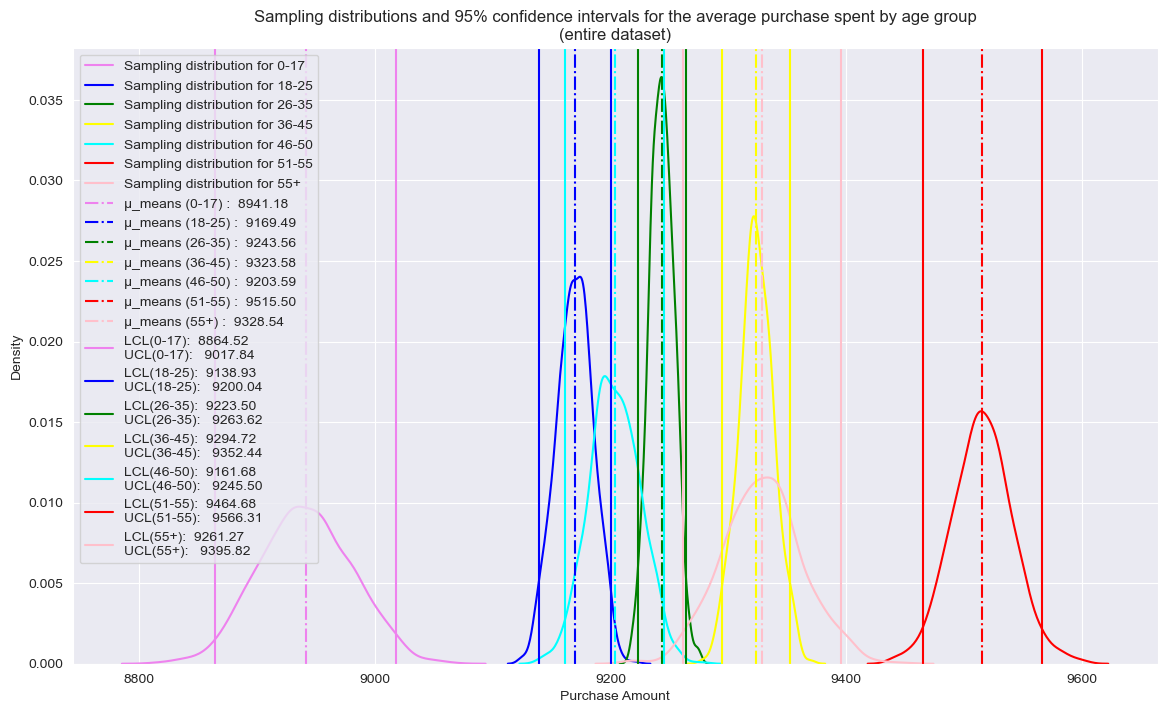

In [327]:
CI_0_17,CI_18_25,CI_26_35,CI_36_45,CI_46_50,CI_51_55,CI_55plus=CI_creator_age(0.95,
                                                                              len(purchase_amount_0_17),len(purchase_amount_18_25),
                                                                              len(purchase_amount_26_35),len(purchase_amount_36_45),
                                                                              len(purchase_amount_46_50),len(purchase_amount_51_55),
                                                                              len(purchase_amount_55plus),
                                                                              "(entire dataset)")

In [328]:
CI_summary=pd.DataFrame(data={
    'Age Group':['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
    'Confidence Interval':[CI_0_17,CI_18_25,CI_26_35,CI_36_45,CI_46_50,CI_51_55,CI_55plus],
    'Center of CI':[(CI_0_17[0]+CI_0_17[1])/2,(CI_18_25[0]+CI_18_25[1])/2,(CI_26_35[0]+CI_26_35[1])/2,(CI_36_45[0]+CI_36_45[1])/2,
                    (CI_46_50[0]+CI_46_50[1])/2,(CI_51_55[0]+CI_51_55[1])/2,(CI_55plus[0]+CI_55plus[1])/2],
    'Width of CI':[CI_0_17[1]-CI_0_17[0],CI_18_25[1]-CI_18_25[0],CI_26_35[1]-CI_26_35[0],CI_36_45[1]-CI_36_45[0],
                   CI_46_50[1]-CI_46_50[0],CI_51_55[1]-CI_51_55[0],CI_55plus[1]-CI_55plus[0]]
})
CI_summary.set_index('Age Group', inplace=True)
CI_summary

,Confidence Interval,Center of CI,Width of CI
Age Group,,,
0-17,"[8864.52, 9017.84]",8941.180,153.32
18-25,"[9138.93, 9200.04]",9169.485,61.11
26-35,"[9223.5, 9263.62]",9243.560,40.12
36-45,"[9294.72, 9352.44]",9323.580,57.72
46-50,"[9161.68, 9245.5]",9203.590,83.82
51-55,"[9464.68, 9566.31]",9515.495,101.63
55+,"[9261.27, 9395.82]",9328.545,134.55


<ins>Observations</ins>
- The confidence intervals for the youngest and oldest age group of customers are wide, indicating greater variability in the types of products purchases leading to a wider range of purchase amounts. The narrowest confidence interval is for customers in the 26-35 age group.
- The mean of the sampling distribution is highest for those in the 51-55 age group and lowest for the 0-17 age group. These groups also have fairly lower probability density indicating that they do not form the bulk of customers. The graph indicates that a huge chunk of customers are concentrated in the region of 9150-9350. These customers are mainly in the young adult age group.

#### 95% confidence intervals for the average amount spent by age group (smaller sample sizes, n=300, 3000, 30000)

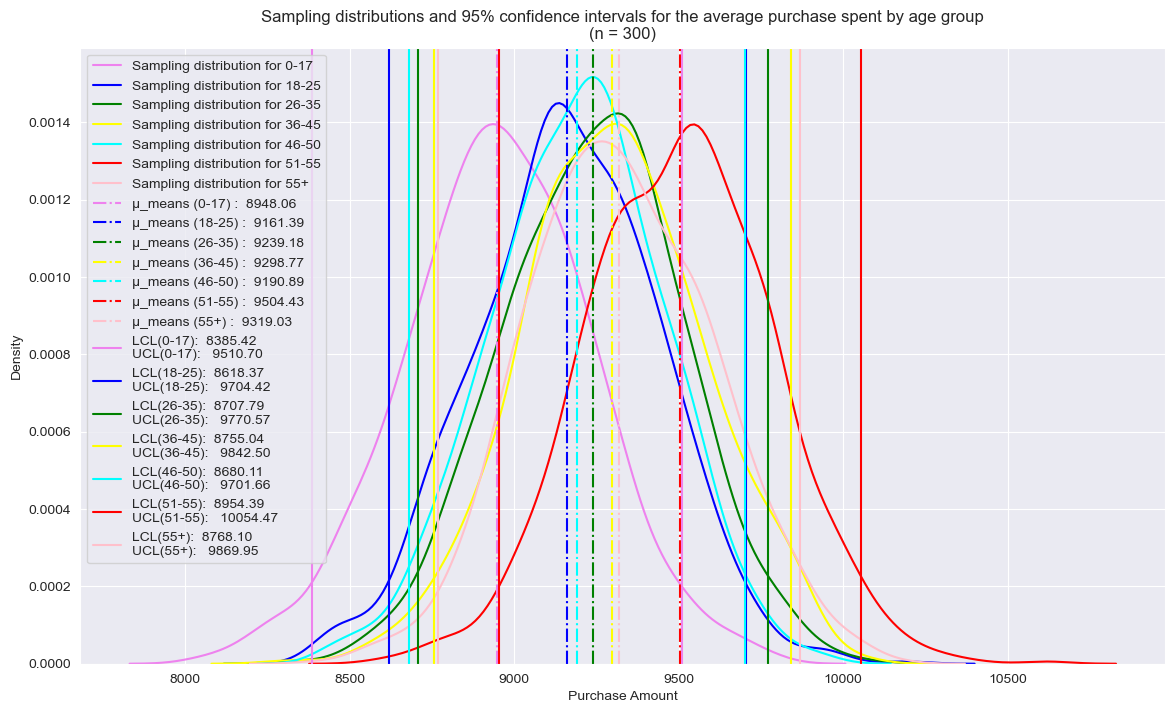

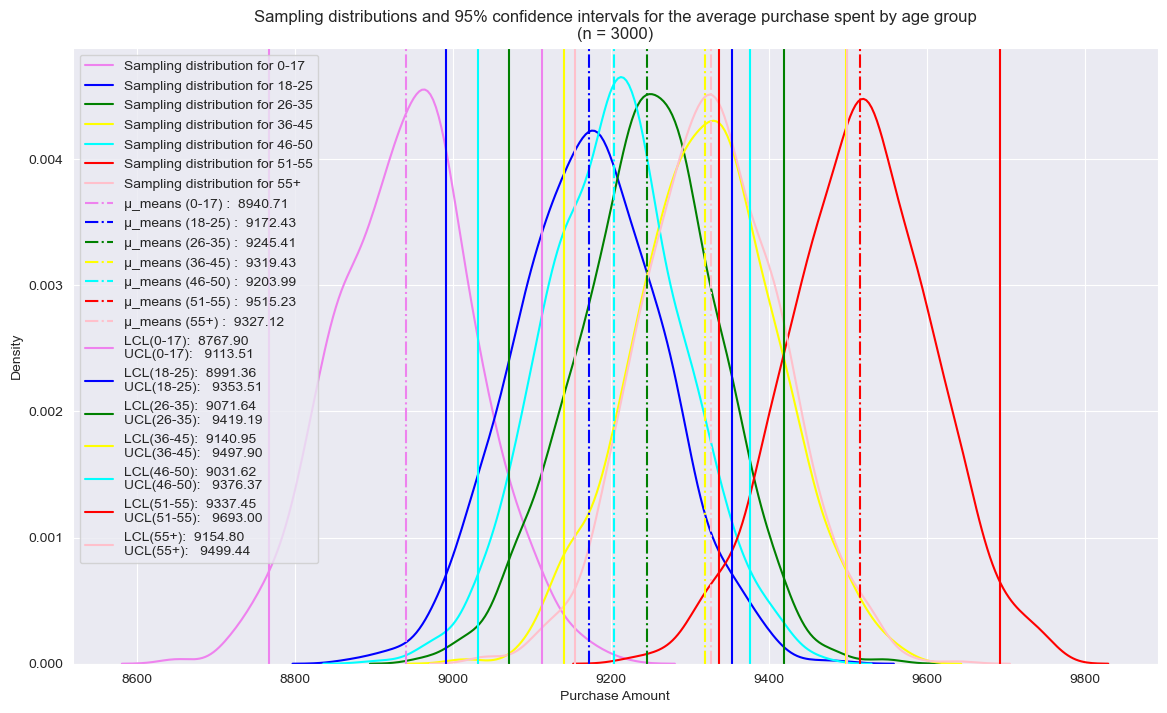

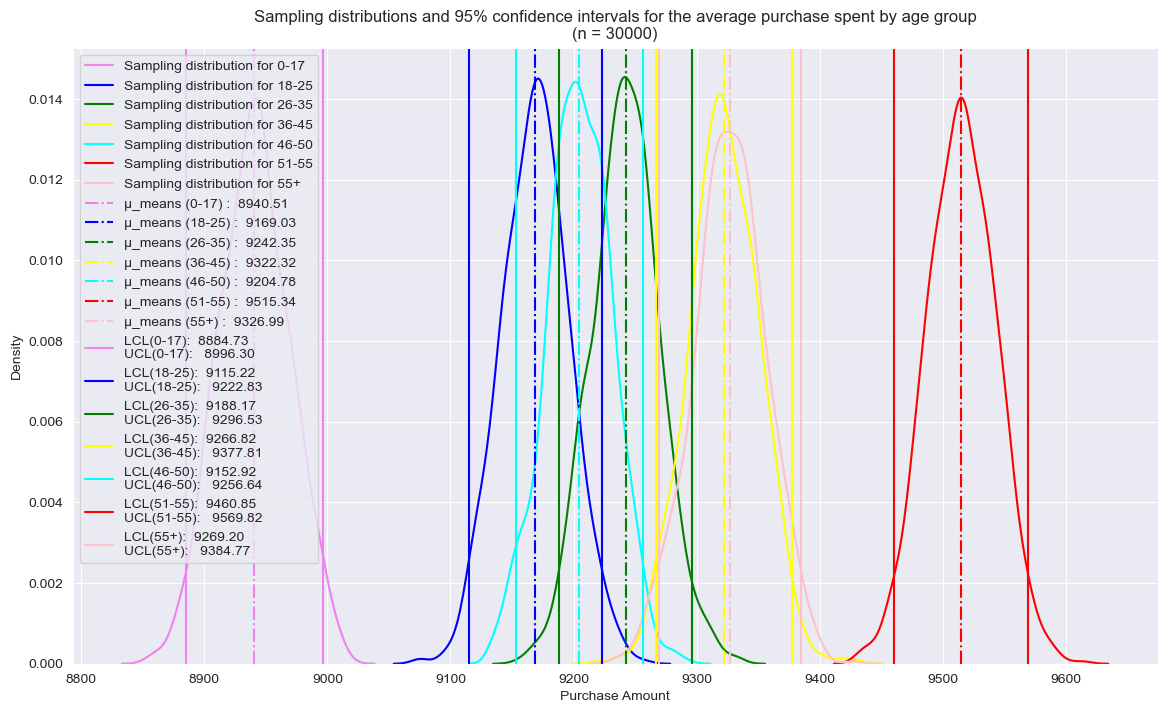

In [331]:
CI_0_17_300,CI_18_25_300,CI_26_35_300,CI_36_45_300,CI_46_50_300,CI_51_55_300,CI_55plus_300=CI_creator_age(0.95,300,300,300,300,300,300,300,"(n = 300)")
CI_0_17_3000,CI_18_25_3000,CI_26_35_3000,CI_36_45_3000,CI_46_50_3000,CI_51_55_3000,CI_55plus_3000=CI_creator_age(0.95,3000,3000,3000,3000,3000,3000,3000,"(n = 3000)")
CI_0_17_30000,CI_18_25_30000,CI_26_35_30000,CI_36_45_30000,CI_46_50_30000,CI_51_55_30000,CI_55plus_30000=CI_creator_age(0.95,30000,30000,30000,30000,30000,30000,30000,"(n = 30000)")

In [332]:
CI_summary=pd.DataFrame(data={
    'n':[300,300,300,300,300,300,300,
        3000,3000,3000,3000,3000,3000,3000,
        30000,30000,30000,30000,30000,30000,30000],
    'Age Group':['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+',
                '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+',
                '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
    'Confidence Interval':[CI_0_17_300,CI_18_25_300,CI_26_35_300,CI_36_45_300,CI_46_50_300,CI_51_55_300,CI_55plus_300,
                          CI_M_3000,CI_M_3000,CI_M_3000,CI_M_3000,CI_M_3000,CI_M_3000,CI_M_3000,
                          CI_0_17_30000,CI_18_25_30000,CI_26_35_30000,CI_36_45_30000,CI_46_50_30000,CI_51_55_30000,CI_55plus_30000],
    'Center of CI':[(CI_0_17_300[0]+CI_0_17_300[1])/2,(CI_18_25_300[0]+CI_18_25_300[1])/2,(CI_26_35_300[0]+CI_26_35_300[1])/2,
                    (CI_36_45_300[0]+CI_36_45_300[1])/2,(CI_46_50_300[0]+CI_46_50_300[1])/2,(CI_51_55_300[0]+CI_51_55_300[1])/2,
                    (CI_55plus_300[0]+CI_55plus_300[1])/2,
                    (CI_0_17_3000[0]+CI_0_17_3000[1])/2,(CI_18_25_3000[0]+CI_18_25_3000[1])/2,(CI_26_35_3000[0]+CI_26_35_3000[1])/2,
                    (CI_36_45_3000[0]+CI_36_45_3000[1])/2,(CI_46_50_3000[0]+CI_46_50_3000[1])/2,(CI_51_55_3000[0]+CI_51_55_3000[1])/2,
                    (CI_55plus_3000[0]+CI_55plus_3000[1])/2,
                    (CI_0_17_30000[0]+CI_0_17_30000[1])/2,(CI_18_25_30000[0]+CI_18_25_30000[1])/2,(CI_26_35_30000[0]+CI_26_35_30000[1])/2,
                    (CI_36_45_30000[0]+CI_36_45_30000[1])/2,(CI_46_50_30000[0]+CI_46_50_30000[1])/2,(CI_51_55_30000[0]+CI_51_55_30000[1])/2,
                    (CI_55plus_30000[0]+CI_55plus_30000[1])/2],
    'Width of CI':[CI_0_17_300[1]-CI_0_17_300[0],CI_18_25_300[1]-CI_18_25_300[0],CI_26_35_300[1]-CI_26_35_300[0],
                   CI_36_45_300[1]-CI_36_45_300[0],CI_46_50_300[1]-CI_46_50_300[0],CI_51_55_300[1]-CI_51_55_300[0],
                   CI_55plus_300[1]-CI_55plus_300[0],
                   CI_0_17_3000[1]-CI_0_17_3000[0],CI_18_25_3000[1]-CI_18_25_3000[0],CI_26_35_3000[1]-CI_26_35_3000[0],
                   CI_36_45_3000[1]-CI_36_45_3000[0],CI_46_50_3000[1]-CI_46_50_3000[0],CI_51_55_3000[1]-CI_51_55_3000[0],
                   CI_55plus_3000[1]-CI_55plus_3000[0],
                   CI_0_17_30000[1]-CI_0_17_30000[0],CI_18_25_30000[1]-CI_18_25_30000[0],CI_26_35_30000[1]-CI_26_35_30000[0],
                   CI_36_45_30000[1]-CI_36_45_30000[0],CI_46_50_30000[1]-CI_46_50_30000[0],CI_51_55_30000[1]-CI_51_55_30000[0],
                   CI_55plus_30000[1]-CI_55plus_30000[0]]
})
CI_summary.set_index(['n','Age Group'],inplace=True)
CI_summary

Confidence Interval  Center of CI  Width of CI
n     Age Group                                                
300   0-17         [8385.42, 9510.7]      8948.060      1125.28
      18-25       [8618.37, 9704.42]      9161.395      1086.05
      26-35       [8707.79, 9770.57]      9239.180      1062.78
      36-45        [8755.04, 9842.5]      9298.770      1087.46
      46-50       [8680.11, 9701.66]      9190.885      1021.55
      51-55      [8954.39, 10054.47]      9504.430      1100.08
      55+          [8768.1, 9869.95]      9319.025      1101.85
3000  0-17        [9159.31, 9495.67]      8940.705       345.61
      18-25       [9159.31, 9495.67]      9172.435       362.15
      26-35       [9159.31, 9495.67]      9245.415       347.55
      36-45       [9159.31, 9495.67]      9319.425       356.95
      46-50       [9159.31, 9495.67]      9203.995       344.75
      51-55       [9159.31, 9495.67]      9515.225       355.55
      55+         [9159.31, 9495.67]      9327.120       344.64
30000 0-17         [8884.73, 8996.3]      8940.515       111.57
      18-25       [9115.22, 9222.83]      9169.025       107.61
      26-35       [9188.17, 9296.53]      9242.350       108.36
      36-45       [9266.82, 9377.81]      9322.315       110.99
      46-50       [9152.92, 9256.64]      9204.780       103.72
      51-55       [9460.85, 9569.82]      9515.335       108.97
      55+          [9269.2, 9384.77]      9326.985       115.57

<ins>Observations</ins>
- It can be observed that the widths of the confidence intervals decrease with increase in the sample size. This is because the standard error of the means reduces.
- There is a lot of overlap in the confidence intervals at smaller sample sizes. This is due to the larger variance of the sampling distributions. With increase in sample sizes, the intervals become more compact and precise which helps to identify signficant differences in the average purchase amounts among the different age groups. Simple inspection of the graph shows a signficant different in the averages between the 0-17 and 51-55 age groups.
- It is observed that with increase in the sample size, the shape of the sampling distributions of means becomes more and more like a crisp normal (bell-shaped) curve, with fewer and fewer distortions. Further, the variability in the distributions decreases as the sample size increases.

---

## 7. Report

### a. Inferences from the confidence intervals for gender

<ins>Observations</ins>
- The 95% confidence interval (computed using all the data) for the average amount spent by male customers on Black Friday is (9412.51, 9441.12) and that for female customers is (8711.82, 8760.42).
- These two intervals do not overlap, indicating a significant difference in the average amount spent by male and female customers on Black Friday. Male customers have a significantly higher spending amount as compared to female customers.

<ins>Suggestions</ins>
- Utilize data to identify the most popular product categories among male customers. Use targeted ads or discount bundles to increase sales in these categories.
- Although females spend less on average, there is potential to increase their spending through targeted promotions and upselling strategies.
- Since Black Friday happens once a year and competition is high, it is important to make customers aware of the offers and discounts available through targeted advertisements and personalized emails or text messages.
- Partition items in the store according to groups of items that are more likely to be purchased by male and female customers.
- Determine the products whose stocks ran out during the Black Friday sale and ensure sufficient inventory sizes in the future.

### b. Inferences from the confidence intervals for marital status

<ins>Observations</ins>
- The 95% confidence interval (computed using all the data) for the average amount spent by married customers on Black Friday is (9241.85, 9275.66) and that for unmarried customers is (9234.18, 9273.41).
- These two intervals do overlap, indicating that there is no significant difference in the average amount spent by married and unmarried customers on Black Friday.

<ins>Suggestions</ins>
- Since the average spending between married and unmarried customers is very similar, Walmart can adopt a general marketing strategy instead of distinguishing between these groups.
- Emphasize on quality of products and ensure smooth in-store customer experience.
- Consider not collecting marital status information in the future as many customers may not be comfortable sharing this information and it adds little value to the analysis.

### c. Inferences from the confidence intervals for age

<ins>Observations</ins>
- The 95% confidence intervals (computed using all the data) for the different age groups are listed below : 
    - 0-17 : (8864.52, 9017.84)
    - 18-25 : (9138.93, 9200.04)
    - 26-35 : (9223.50, 9263.62)
    - 36-45 : (9294.72, 9352.44)
    - 46-50 : (9161.68, 9245.50)
    - 51-55 : (9464.68, 9566.31)
    - 55+ : (9261.27, 9395.82)
- There is no overlap in the confidence intervals for the youngest age group of 0-17 and the other age groups. There is little to no overlap in the intervals for the the 51-55 age group and the remaining groups. There is also no overlap between the intervals of the 18-25 and 26-35 groups. Overlap is observed in the intervals of the 36-45, 46-50, and 55+ age groups.

<ins>Suggestions</ins>
- The 51-55+ age group has the highest average spending. Walmart can create premium product offerings, exclusive deals, and high-value promotions targeted at this group. Since this age group is relatively old, identify the product categories that cater to their needs and offer discounts and bundle deals on these products as it is important to retain this customer base.
- The 36-45 and 55+ age group also have fairly high spending. Highlight products that cater to mature households, such as home improvement items, high-end electronics, and quality apparel.
- As expected, younger customers (0-17 age group) has the lowest average spend. However, they tend to be more tech savvy and using social media campaigns as well as offering attractive discounts on popular items are some of the strategies to maximize revenue from this demographic.

---

## 8. Recommendations

- Roll out loyalty programs and attractive discounts for high spending age groups such as 26-36 and 51-55 as they contribute significantly to the revenue. Retaining this base is crucial to the company.
- Increase youth engagement for the 0-17 and 18-25 age groups through social media campaigns, influencer partnerships, and products that appeal to younger consumers.
- Since Product Categories 5, 1, and 8 are the most popular, ensure they are well-stocked and prominently featured in ads.
- Explore the possibility of combining the most popular products along with less popular ones by offering bundle deals.
- Create gender-specific promotions that emphasize the most popular categories for each group.
- Discontinue collection of marital status information as it may be considered intrusive and also does not hold much analytical value.
- Enhance in-store customer experience and develop intelligent store design in which related products are in close proximity.
- Since Black Friday happens once a year and competition is high, it is important to make customers aware of the offers and discounts available through targeted advertisements and personalized emails or text messages.
- Develop detailed customer segmentation based on age group and gender spending habits to personalize promotions and product recommendations.

---
---